In [1]:
import scanpy as sc
import pandas as pd
import pickle
import numpy as np
import graph_tool.all as gt
%matplotlib inline
%pylab

/usr/lib/python3/dist-packages/graph_tool/draw/cairo_draw.py:39: RuntimeWarning: Error importing cairo. Graph drawing will not work.
  warnings.warn(msg, RuntimeWarning)
/usr/lib/python3/dist-packages/graph_tool/draw/cairo_draw.py:39: RuntimeWarning: Error importing cairo. Graph drawing will not work.
  warnings.warn(msg, RuntimeWarning)
/usr/lib/python3/dist-packages/graph_tool/draw/cairo_draw.py:39: RuntimeWarning: Error importing cairo. Graph drawing will not work.
  warnings.warn(msg, RuntimeWarning)
/usr/lib/python3/dist-packages/graph_tool/all.py:40: RuntimeWarning: Error importing draw module, proceeding nevertheless: /usr/lib/python3/dist-packages/cairo/_cairo.cpython-37m-x86_64-linux-gnu.so: undefined symbol: cairo_tee_surface_index
  warnings.warn(msg, RuntimeWarning)


Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [2]:
import anndata
adata=sc.read('adata_10x/adata_sc_10x.h5ad')
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')
df_significativo= pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(20) #### df con i 20 geni significativi per gruppo
cell_annotation= pd.read_table('../sc_mixology/data/csv/sc_10x_5cl.metadata.csv.gz', compression="gzip", sep=",", index_col=0)
adata.obs.loc[:, "cell_line"] = cell_annotation.loc[adata.obs_names, "cell_line"]

In [3]:
g = pickle.load( open( "adata_10x/10x_graph_g.pkl", "rb" ))

In [4]:
state5=pickle.load(open('adata_10x/10x_equilibrate_final_test/10x_state5.pkl','rb'))

In [5]:
state4=pickle.load(open('adata_10x/10x_equilibrate_final_test/10x_state4.pkl','rb'))

In [6]:
estate=pickle.load(open('adata_10x/10x_equilibrate_final_test/10x_state_for_callback.pkl','rb'))

# 1) multiflip state 5

### a) state5 niter 10.000 (00:49)

In [8]:
bs = state5.get_bs()                   
bs += [np.zeros(1)] * (10 - len(bs))

In [9]:
state = state5.copy(bs=bs, sampling=True)

In [19]:
state.multiflip_mcmc_sweep(niter=10000)
state

<NestedBlockState object, with base <BlockState object with 74 blocks (67 nonempty), for graph <Graph object, undirected, with 860 vertices and 5976 edges at 0x7f66cc27bbd0>, at 0x7f66a066d590>, and 10 levels of sizes [(860, 67), (67, 14), (14, 5), (5, 2), (2, 2), (2, 1), (1, 1), (1, 1), (1, 1), (1, 1)] at 0x7f66a066d850>

In [13]:
pickle.dump(state, open('adata_10x/10x_multiflip_mcmc/state5_ma.pkl', 'wb'), 2)

In [14]:
state5_ma=pickle.load(open('adata_10x/10x_multiflip_mcmc/state5_ma.pkl','rb'))

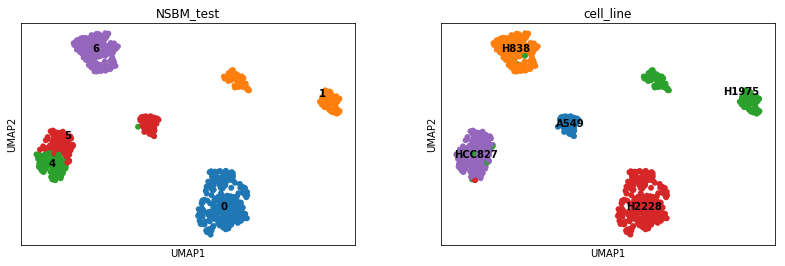

cell_line,A549,H838,H1975,H2228,HCC827
NSBM_test,,,,,
0,0,0,0,295,0
1,0,0,127,0,0
4,1,0,1,1,98
5,61,0,3,0,90
6,0,176,7,0,0


In [20]:
adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(state5_ma.project_level(2).get_blocks()))
sc.pl.umap(adata, color=["NSBM_test", 'cell_line'], legend_loc='on data')
pd.crosstab(adata.obs.NSBM_test, adata.obs.cell_line)

### b) state5 niter 1.000; Gibbs_sweep=100 (00:35)

In [65]:
bs = state5.get_bs()                   
bs += [np.zeros(1)] * (10 - len(bs))
state = state5.copy(bs=bs, sampling=True)

In [66]:
state.multiflip_mcmc_sweep(gibbs_sweeps=100,niter=1000)

(8.060958190556441, 745162, 12734)

In [67]:
state

<NestedBlockState object, with base <BlockState object with 73 blocks (68 nonempty), for graph <Graph object, undirected, with 860 vertices and 5976 edges at 0x7f66cc27bbd0>, at 0x7f66a025d350>, and 10 levels of sizes [(860, 68), (68, 14), (14, 5), (5, 3), (3, 2), (2, 1), (1, 1), (1, 1), (1, 1), (1, 1)] at 0x7f66a025d510>

In [68]:
pickle.dump(state, open('adata_10x/10x_multiflip_mcmc/state5_mb.pkl', 'wb'), 2)

In [69]:
state5_mb=pickle.load(open('adata_10x/10x_multiflip_mcmc/state5_mb.pkl','rb'))

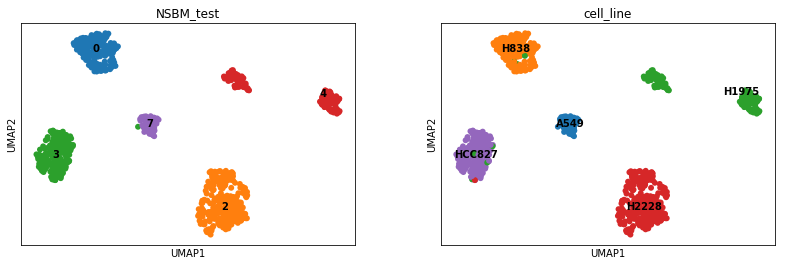

cell_line,A549,H838,H1975,H2228,HCC827
NSBM_test,,,,,
0,0,176,7,0,0
2,0,0,0,295,0
3,1,0,4,1,188
4,0,0,127,0,0
7,61,0,0,0,0


In [70]:
adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(state5_mb.project_level(2).get_blocks()))
sc.pl.umap(adata, color=["NSBM_test", 'cell_line'], legend_loc='on data')
pd.crosstab(adata.obs.NSBM_test, adata.obs.cell_line)

### c) state5: niter=10.000; gibbs_sweep=100 (6:51)

In [71]:
bs = state5.get_bs()                   
bs += [np.zeros(1)] * (10 - len(bs))
state = state5.copy(bs=bs, sampling=True)

In [73]:
state.multiflip_mcmc_sweep(gibbs_sweeps=100,niter=10000)

(23.944734589411734, 7476703, 126948)

In [74]:
state

<NestedBlockState object, with base <BlockState object with 76 blocks (68 nonempty), for graph <Graph object, undirected, with 860 vertices and 5976 edges at 0x7f66cc27bbd0>, at 0x7f669bbf6950>, and 10 levels of sizes [(860, 68), (68, 14), (14, 5), (5, 3), (3, 2), (2, 1), (1, 1), (1, 1), (1, 1), (1, 1)] at 0x7f66a02bc450>

In [75]:
pickle.dump(state, open('adata_10x/10x_multiflip_mcmc/state5_mc.pkl', 'wb'), 2)

In [76]:
state5_mc=pickle.load(open('adata_10x/10x_multiflip_mcmc/state5_mc.pkl','rb'))

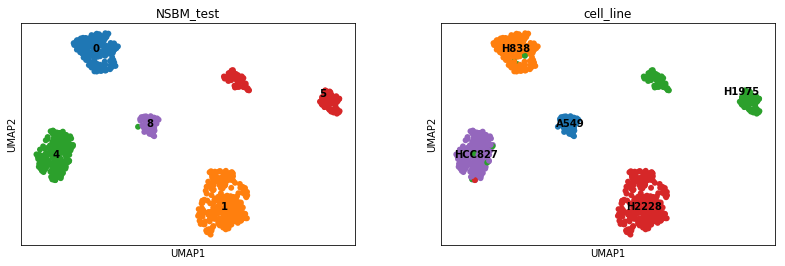

cell_line,A549,H838,H1975,H2228,HCC827
NSBM_test,,,,,
0,0,176,7,0,0
1,0,0,0,295,0
4,1,0,4,1,188
5,0,0,127,0,0
8,61,0,0,0,0


In [77]:
adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(state5_mc.project_level(2).get_blocks()))
sc.pl.umap(adata, color=["NSBM_test", 'cell_line'], legend_loc='on data')
pd.crosstab(adata.obs.NSBM_test, adata.obs.cell_line)

### d) state5: niter=10.000; gibbs_sweep=10 (1:30)

In [78]:
bs = state5.get_bs()                   
bs += [np.zeros(1)] * (10 - len(bs))
state = state5.copy(bs=bs, sampling=True)

In [79]:
state.multiflip_mcmc_sweep(gibbs_sweeps=10,niter=10000)

(50.71436293004109, 7458443, 129168)

In [80]:
state

<NestedBlockState object, with base <BlockState object with 74 blocks (69 nonempty), for graph <Graph object, undirected, with 860 vertices and 5976 edges at 0x7f66cc27bbd0>, at 0x7f66a0101bd0>, and 10 levels of sizes [(860, 69), (69, 17), (17, 6), (6, 3), (3, 2), (2, 1), (1, 1), (1, 1), (1, 1), (1, 1)] at 0x7f66a0101d90>

In [81]:
pickle.dump(state, open('adata_10x/10x_multiflip_mcmc/state5_md.pkl', 'wb'), 2)

In [82]:
state5_md=pickle.load(open('adata_10x/10x_multiflip_mcmc/state5_md.pkl','rb'))

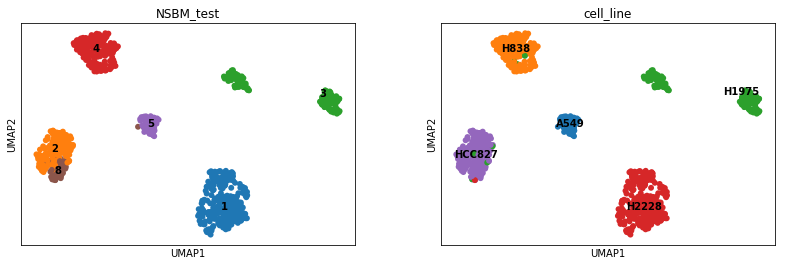

cell_line,A549,H838,H1975,H2228,HCC827
NSBM_test,,,,,
1,0,0,0,295,0
2,0,0,3,0,145
3,0,0,127,0,0
4,0,176,7,0,0
5,61,0,0,0,0
8,1,0,1,1,43


In [83]:
adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(state5_md.project_level(2).get_blocks()))
sc.pl.umap(adata, color=["NSBM_test", 'cell_line'], legend_loc='on data')
pd.crosstab(adata.obs.NSBM_test, adata.obs.cell_line)

#### ho visto cambiando i parametri i tempi di attesa e che teoricamente tutti possono suddividere in 5 gruppi corretti il campione (partendo da state 5)
# 2) multiflip state4
### a) niter=1000 (00:06)

In [10]:
bs = state4.get_bs()                   
bs += [np.zeros(1)] * (10 - len(bs))
state = state4.copy(bs=bs, sampling=True)

In [96]:
state.multiflip_mcmc_sweep(niter=1000)

(12.991985828459566, 739793, 11615)

In [97]:
state

<NestedBlockState object, with base <BlockState object with 75 blocks (70 nonempty), for graph <Graph object, undirected, with 860 vertices and 5976 edges at 0x7f671ec808d0>, at 0x7f66a05f0cd0>, and 10 levels of sizes [(860, 70), (70, 15), (15, 5), (5, 3), (3, 2), (2, 1), (1, 1), (1, 1), (1, 1), (1, 1)] at 0x7f66a05f04d0>

In [98]:
pickle.dump(state, open('adata_10x/10x_multiflip_mcmc/state4_ma.pkl', 'wb'), 2)

In [99]:
state4_ma=pickle.load(open('adata_10x/10x_multiflip_mcmc/state4_ma.pkl','rb'))

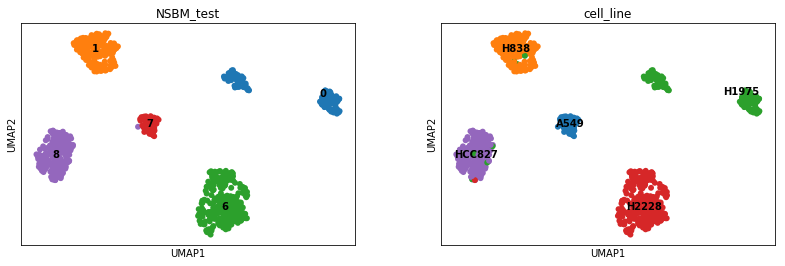

cell_line,A549,H838,H1975,H2228,HCC827
NSBM_test,,,,,
0,0,0,127,0,0
1,0,176,7,0,0
6,0,0,0,295,0
7,61,0,0,0,0
8,1,0,4,1,188


In [100]:
adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(state4_ma.project_level(2).get_blocks()))
sc.pl.umap(adata, color=["NSBM_test", 'cell_line'], legend_loc='on data')
pd.crosstab(adata.obs.NSBM_test, adata.obs.cell_line)

##### ci mette davvero poco, e spesso ottengo il risultato corretto. ORA È NECESSARIO ITERARE 10 VOLTE LO STESSO MULTIFLIP E VEDERE QUANTE VOLTE OTTENGO IL RISULTATO CORRETTO SU STATE4 
# 3) vedo come varia la deltaS (entropia) in multiflip e mcmc_sweep
### a)niter 10.000

In [7]:
bs = state4.get_bs()                   
bs += [np.zeros(1)] * (10 - len(bs))
state = state4.copy(bs=bs, sampling=True)

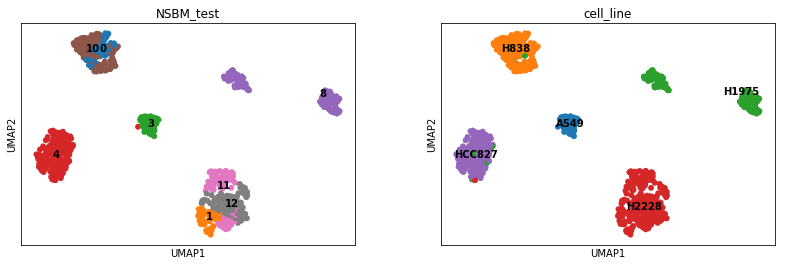

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0             0    43      5      0       0
1             0     0      0     56       0
3            61     0      0      0       0
4             1     0      4      1     188
8             0     0    127      0       0
10            0   133      2      0       0
11            0     0      0    110       0
12            0     0      0    129       0


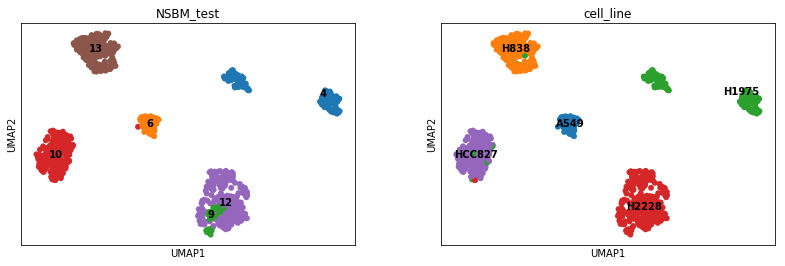

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
4             0     0    127      0       0
6            61     0      0      0       0
9             0     0      0     41       0
10            1     0      4      1     188
12            0     0      0    254       0
13            0   176      7      0       0


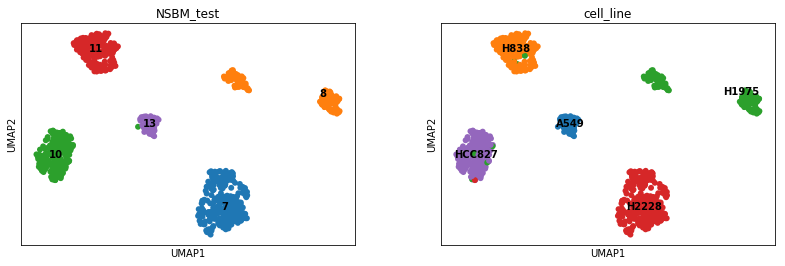

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
7             0     0      0    295       0
8             0     0    127      0       0
10            1     0      4      1     188
11            0   176      7      0       0
13           61     0      0      0       0


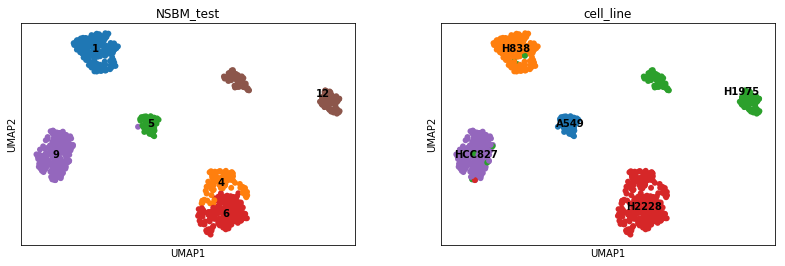

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
1             0   176      7      0       0
4             0     0      0     93       0
5            61     0      0      0       0
6             0     0      0    202       0
9             1     0      4      1     188
12            0     0    127      0       0


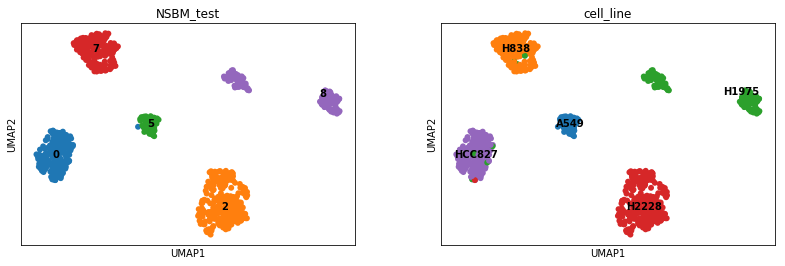

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0             1     0      4      1     188
2             0     0      0    295       0
5            61     0      0      0       0
7             0   176      7      0       0
8             0     0    127      0       0


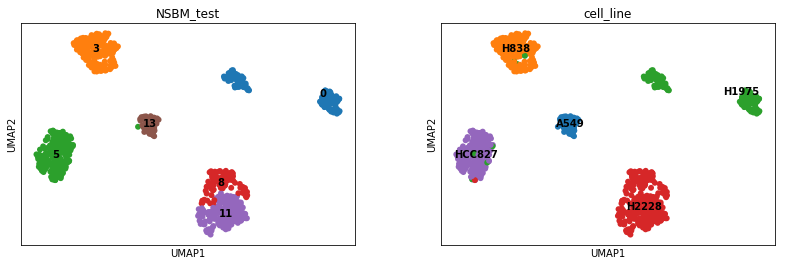

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0             0     0    127      0       0
3             0   176      7      0       0
5             1     0      4      1     188
8             0     0      0     94       0
11            0     0      0    201       0
13           61     0      0      0       0


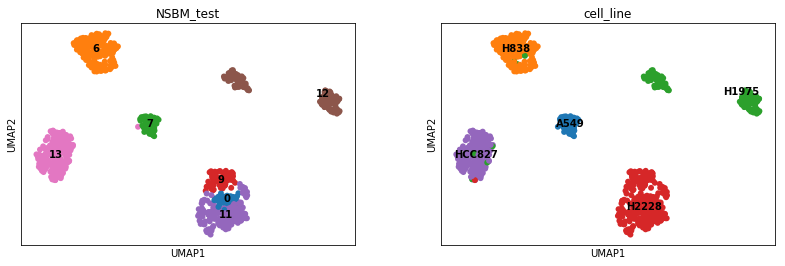

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0             0     0      0     44       0
6             0   176      7      0       0
7            61     0      0      0       0
9             0     0      0     70       0
11            0     0      0    181       0
12            0     0    127      0       0
13            1     0      4      1     188


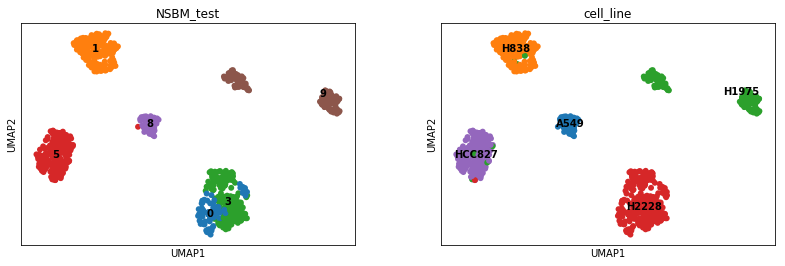

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0             0     0      0     84       0
1             0   176      7      0       0
3             0     0      0    211       0
5             1     0      4      1     188
8            61     0      0      0       0
9             0     0    127      0       0


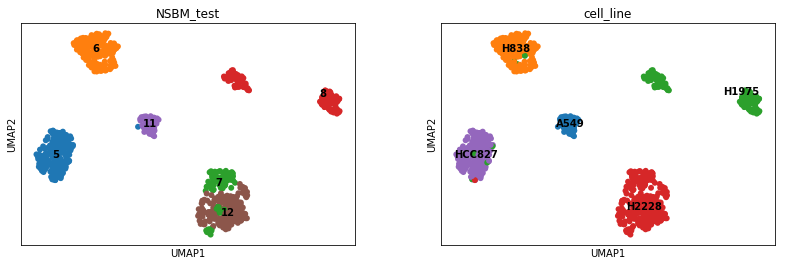

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
5             1     0      4      1     188
6             0   176      7      0       0
7             0     0      0     91       0
8             0     0    127      0       0
11           61     0      0      0       0
12            0     0      0    204       0


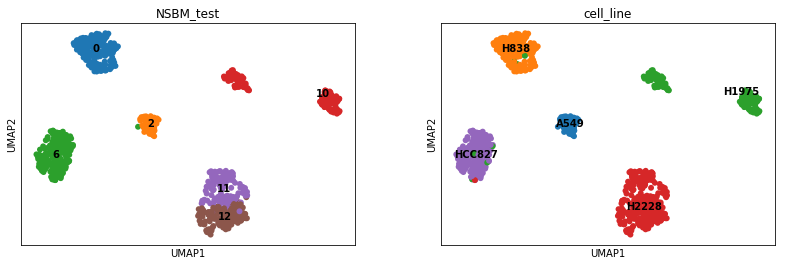

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0             0   176      7      0       0
2            61     0      0      0       0
6             1     0      4      1     188
10            0     0    127      0       0
11            0     0      0    140       0
12            0     0      0    155       0


In [33]:
states_10=[]
for i in range (10):
    i=state.multiflip_mcmc_sweep(niter=10000)
    adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(state.project_level(2).get_blocks()))
    sc.pl.umap(adata, color=["NSBM_test", 'cell_line'], legend_loc='on data')
    print(pd.crosstab(adata.obs.NSBM_test, adata.obs.cell_line))
    states_10.append(i)

In [34]:
multiflip_states=states_10
multiflip_states

[(17.519030771968858, 7507887, 168584),
 (-28.85926447336542, 7499853, 150341),
 (30.83576303830552, 7521858, 142252),
 (-49.13637319701016, 7502273, 137240),
 (20.220783151723175, 7492826, 145690),
 (9.881949629656011, 7453015, 146208),
 (-3.48970581806927, 7478421, 147609),
 (4.95435581133129, 7500405, 157823),
 (-16.193903745773113, 7416089, 141737),
 (5.143171699050773, 7365654, 151588)]

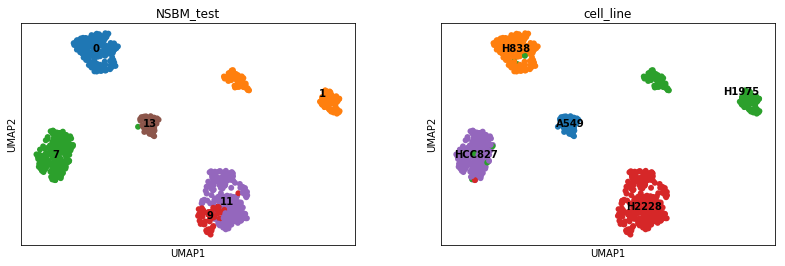

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0             0   176      7      0       0
1             0     0    127      0       0
7             1     0      4      1     188
9             0     0      0     62       0
11            0     0      0    233       0
13           61     0      0      0       0


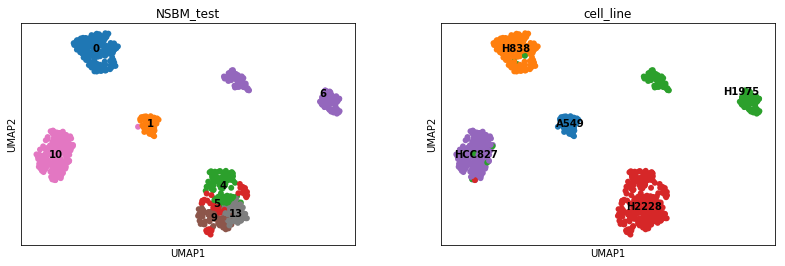

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0             0   176      7      0       0
1            61     0      0      0       0
4             0     0      0    111       0
5             0     0      0     45       0
6             0     0    127      0       0
9             0     0      0     71       0
10            1     0      4      1     188
13            0     0      0     68       0


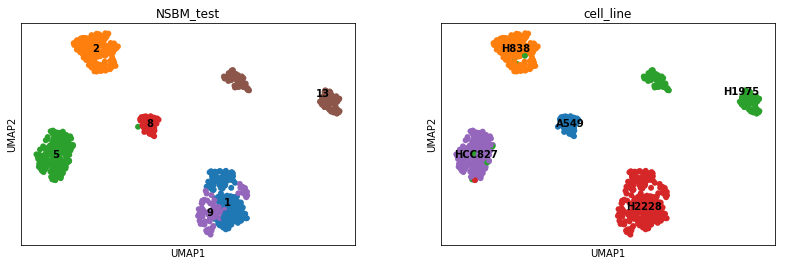

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
1             0     0      0    207       0
2             0   176      7      0       0
5             1     0      4      1     188
8            61     0      0      0       0
9             0     0      0     88       0
13            0     0    127      0       0


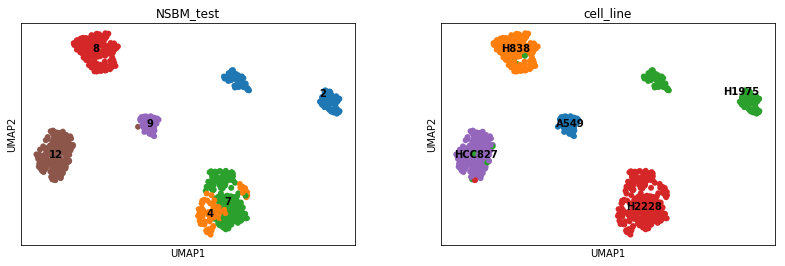

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
2             0     0    127      0       0
4             0     0      0     84       0
7             0     0      0    211       0
8             0   176      7      0       0
9            61     0      0      0       0
12            1     0      4      1     188


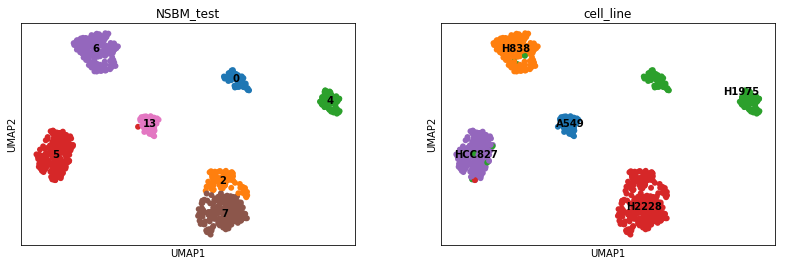

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0             0     0     56      0       0
2             0     0      0     83       0
4             0     0     71      0       0
5             1     0      4      1     188
6             0   176      7      0       0
7             0     0      0    212       0
13           61     0      0      0       0


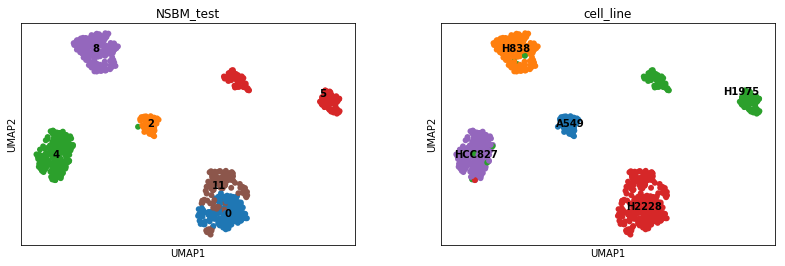

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0             0     0      0    177       0
2            61     0      0      0       0
4             1     0      4      1     188
5             0     0    127      0       0
8             0   176      7      0       0
11            0     0      0    118       0


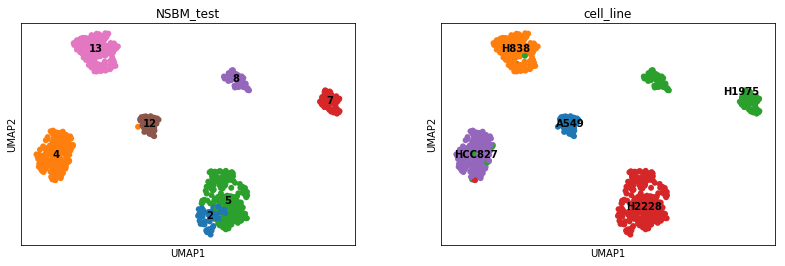

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
2             0     0      0     63       0
4             1     0      4      1     188
5             0     0      0    232       0
7             0     0     71      0       0
8             0     0     56      0       0
12           61     0      0      0       0
13            0   176      7      0       0


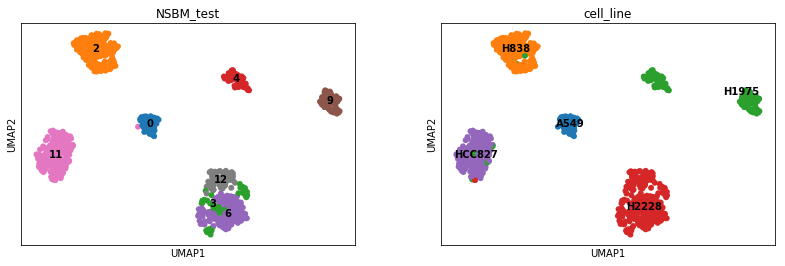

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0            61     0      0      0       0
2             0   176      7      0       0
3             0     0      0     47       0
4             0     0     56      0       0
6             0     0      0    178       0
9             0     0     71      0       0
11            1     0      4      1     188
12            0     0      0     70       0


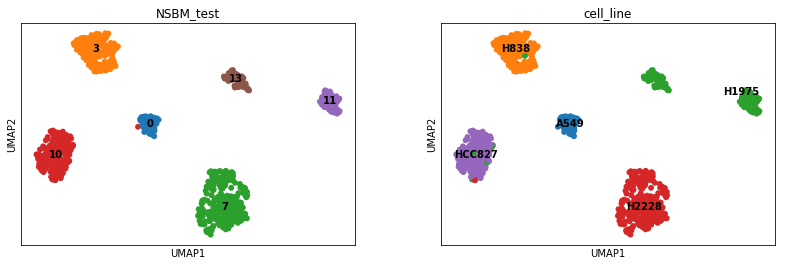

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0            61     0      0      0       0
3             0   176      7      0       0
7             0     0      0    295       0
10            1     0      4      1     188
11            0     0     71      0       0
13            0     0     56      0       0


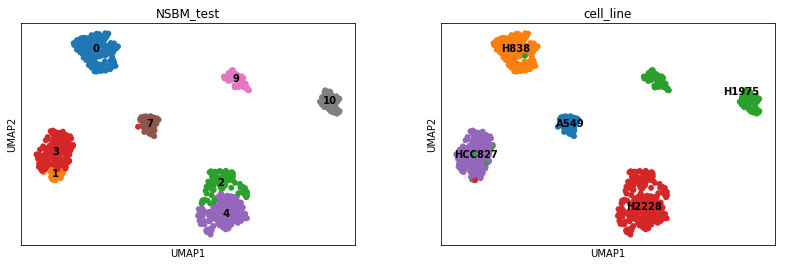

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0             0   176      7      0       0
1             0     0      1      1      29
2             0     0      0     94       0
3             1     0      3      0     159
4             0     0      0    201       0
7            61     0      0      0       0
9             0     0     56      0       0
10            0     0     71      0       0


In [35]:
states_10b=[]
for i in range (10):
    i=state.mcmc_sweep(niter=10000)
    adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(state.project_level(2).get_blocks()))
    sc.pl.umap(adata, color=["NSBM_test", 'cell_line'], legend_loc='on data')
    print(pd.crosstab(adata.obs.NSBM_test, adata.obs.cell_line))
    states_10.append(i)

In [39]:
sweep_states=states_10[10:19]
sweep_states

[(4.194274496939141, 9707292, 2879856),
 (28.596454151838557, 9734820, 2913152),
 (-15.96454661870559, 9734110, 2921204),
 (-19.929491805177566, 9712733, 2894042),
 (-0.0699519601789298, 9714400, 2948489),
 (23.8337043456634, 9737101, 2987499),
 (-14.917745761834784, 9742871, 2972335),
 (9.217358939063608, 9788990, 3013352),
 (27.81912072952249, 9768024, 2978451)]

# 4) Cerco di capire quale sweep (se mcmc o multiflip) è pù reliable a niter minori

### a) multiflip: niter 100.000 (ci mette davver troppo ed è pure sbagliato)

In [ ]:
bs = state4.get_bs()                   
bs += [np.zeros(1)] * (10 - len(bs))
state = state4.copy(bs=bs, sampling=True)

In [12]:
bs = state4.get_bs()                   
bs += [np.zeros(1)] * (10 - len(bs))
state = state4.copy(bs=bs, sampling=True)

In [13]:
state.multiflip_mcmc_sweep(niter=100000)

(11.940142779020924, 74078810, 1047089)

... storing 'cell_line' as categorical


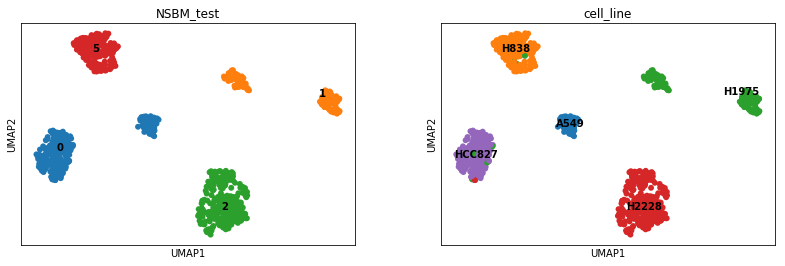

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0            62     0      4      1     188
1             0     0    127      0       0
2             0     0      0    295       0
5             0   176      7      0       0


In [14]:
adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(state.project_level(2).get_blocks()))
sc.pl.umap(adata, color=["NSBM_test", 'cell_line'], legend_loc='on data')
print(pd.crosstab(adata.obs.NSBM_test, adata.obs.cell_line))

In [15]:
pickle.dump(state, open('adata_10x/10x_multiflip_mcmc/multi_state_100k.pkl', 'wb'), 2)

In [16]:
state_100k=pickle.load(open('adata_10x/10x_multiflip_mcmc/multi_state_100k.pkl','rb'))

### b) multiflip: niter=50.000 (03:55; giusto)
##### ancora troppo tempo

In [ ]:
bs = state4.get_bs()                   
bs += [np.zeros(1)] * (10 - len(bs))
state = state4.copy(bs=bs, sampling=True)

In [17]:
state.multiflip_mcmc_sweep(niter=50000)

(31.19206580398336, 37552008, 608600)

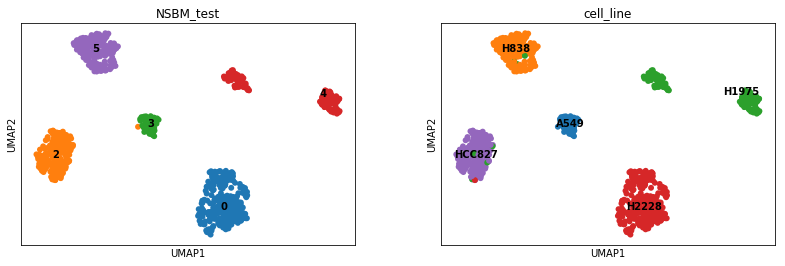

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0             0     0      0    295       0
2             1     0      4      1     188
3            61     0      0      0       0
4             0     0    127      0       0
5             0   176      7      0       0


In [18]:
adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(state.project_level(2).get_blocks()))
sc.pl.umap(adata, color=["NSBM_test", 'cell_line'], legend_loc='on data')
print(pd.crosstab(adata.obs.NSBM_test, adata.obs.cell_line))

In [19]:
pickle.dump(state, open('adata_10x/10x_multiflip_mcmc/multi_state_50k.pkl', 'wb'), 2)

In [20]:
state_50k=pickle.load(open('adata_10x/10x_multiflip_mcmc/multi_state_50k.pkl','rb'))

### c) multiflip: niter= 50.000 d=0.1 (3.45; giusto)
##### tempo paragonabile al precedente, devo diminuire i niter

In [ ]:
bs = state4.get_bs()                   
bs += [np.zeros(1)] * (10 - len(bs))
state = state4.copy(bs=bs, sampling=True)

In [21]:
state.multiflip_mcmc_sweep(d=0.1,niter=50000)

(-23.76991361385503, 36960966, 649368)

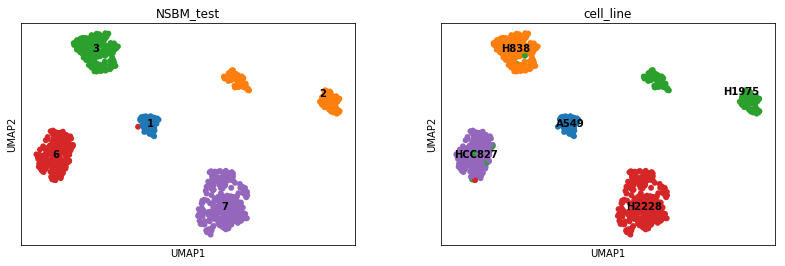

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
1            61     0      0      0       0
2             0     0    127      0       0
3             0   176      7      0       0
6             1     0      4      1     188
7             0     0      0    295       0


In [22]:
adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(state.project_level(2).get_blocks()))
sc.pl.umap(adata, color=["NSBM_test", 'cell_line'], legend_loc='on data')
print(pd.crosstab(adata.obs.NSBM_test, adata.obs.cell_line))

In [25]:
pickle.dump(state, open('adata_10x/10x_multiflip_mcmc/multi_state_50k_d10.pkl', 'wb'), 2)

In [26]:
state50k_d10=pickle.load(open('adata_10x/10x_multiflip_mcmc/multi_state_50k_d10.pkl','rb'))

### d) multiflip: niter= 25.000 d=0.1 (2.04;sbagliato il primo)(1:50, sbagliato il secondo)

In [7]:
bs = state4.get_bs()                   
bs += [np.zeros(1)] * (10 - len(bs))
state = state4.copy(bs=bs, sampling=True)

In [8]:
state.multiflip_mcmc_sweep(d=0.1,niter=25000)

(3.1667983205313917, 18561144, 303088)

... storing 'cell_line' as categorical


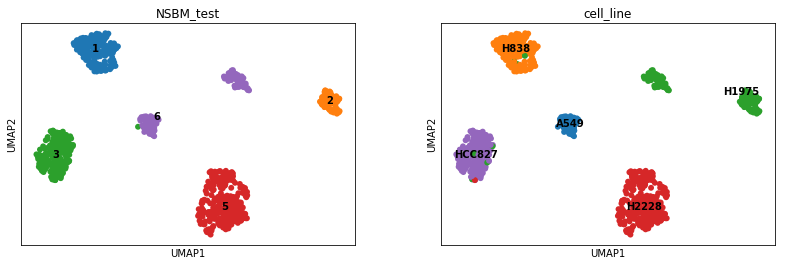

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
1             0   176      7      0       0
2             0     0     71      0       0
3             1     0      4      1     188
5             0     0      0    295       0
6            61     0     56      0       0


In [9]:
adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(state.project_level(2).get_blocks()))
sc.pl.umap(adata, color=["NSBM_test", 'cell_line'], legend_loc='on data')
print(pd.crosstab(adata.obs.NSBM_test, adata.obs.cell_line))

In [10]:
pickle.dump(state, open('adata_10x/10x_multiflip_mcmc/multi_state_25k_d10.pkl', 'wb'), 2)

In [11]:
state25k_d10=pickle.load(open('adata_10x/10x_multiflip_mcmc/multi_state_25k_d10.pkl','rb'))

### e) multiflip:niter= 25.000 d=0.05 (2:00; sbagliatissimo)

In [ ]:
bs = state4.get_bs()                   
bs += [np.zeros(1)] * (10 - len(bs))
state = state4.copy(bs=bs, sampling=True)

In [31]:
state.multiflip_mcmc_sweep(d=0.05,niter=25000)

(-3.23476726738376, 18300338, 388858)

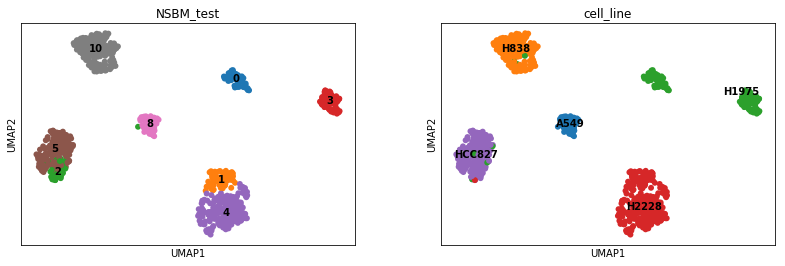

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0             0     0     56      0       0
1             0     0      0     70       0
2             1     0      1      1      40
3             0     0     71      0       0
4             0     0      0    225       0
5             0     0      3      0     148
8            61     0      0      0       0
10            0   176      7      0       0


In [41]:
adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(state_25k_d5.project_level(2).get_blocks()))
sc.pl.umap(adata, color=["NSBM_test", 'cell_line'], legend_loc='on data')
print(pd.crosstab(adata.obs.NSBM_test, adata.obs.cell_line))

In [33]:
pickle.dump(state, open('adata_10x/10x_multiflip_mcmc/multi_state_25k_d5.pkl', 'wb'), 2)

In [34]:
state_25k_d5=pickle.load(open('adata_10x/10x_multiflip_mcmc/multi_state_25k_d5.pkl','rb'))

### f) multiflip: niter=30.000 d=0.05 (2:12; giusto il primo)(2:15;sbagliato il secondo)(2:18; sbagliato)
#### il tempo in generale è buono, il primio tentativo è riuscito bene. il secondo tentativo invece non ha messo insieme cellule diverse, ma ha overclusterizzato le h2228. anche il terzo tentativo ha prodotto overclustering, ma non riconoscimento di gruppi errati. PROVO AD AUMENTARE LA D

In [ ]:
bs = state4.get_bs()                   
bs += [np.zeros(1)] * (10 - len(bs))
state = state4.copy(bs=bs, sampling=True)

In [48]:
state.multiflip_mcmc_sweep(d=0.05,niter=30000)

(17.922645736940765, 22200327, 475934)

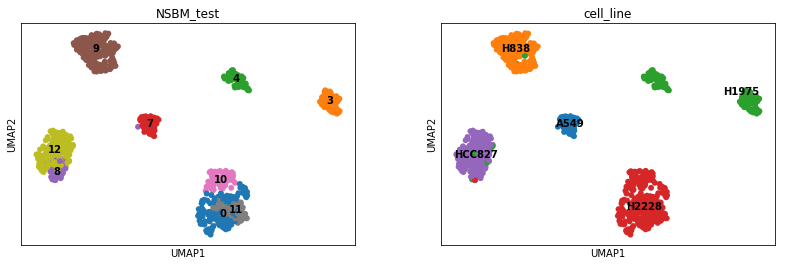

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0             0     0      0    161       0
3             0     0     71      0       0
4             0     0     56      0       0
7            61     0      0      0       0
8             1     0      1      1      38
9             0   176      7      0       0
10            0     0      0     70       0
11            0     0      0     64       0
12            0     0      3      0     150


In [49]:
adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(state.project_level(2).get_blocks()))
sc.pl.umap(adata, color=["NSBM_test", 'cell_line'], legend_loc='on data')
print(pd.crosstab(adata.obs.NSBM_test, adata.obs.cell_line))

In [50]:
pickle.dump(state, open('adata_10x/10x_multiflip_mcmc/multi_state_30k_d5.pkl', 'wb'), 2)

In [51]:
state_30k_d5=pickle.load(open('adata_10x/10x_multiflip_mcmc/multi_state_30k_d5.pkl','rb'))

### g) multiflip: niter=30.000 d=0.08 (2:18, I sbagliato)(2:15, sbagliato)(2:13, sbagliato)(2:20 giusto)(2:15 giusto)(2.01 sbagliato)
##### i tempi sono in linea con i 30.000 niter di sopra: il primo tentativo mostra ancora overclustering delle H2228, anche se meno marcato dei tentativi con un d=0.05.Anche nel secondo tentativo c'è overclustering (sneza unire gruppi sbagliati). ancora stesso problema. Provo con d=0.1, anche cluster errato nell'ultimo tentativo

In [18]:
bs = state4.get_bs()                   
bs += [np.zeros(1)] * (10 - len(bs))
state = state4.copy(bs=bs, sampling=True)

In [19]:
state.multiflip_mcmc_sweep(d=0.08,niter=30000)

(27.822652419506973, 22676311, 400938)

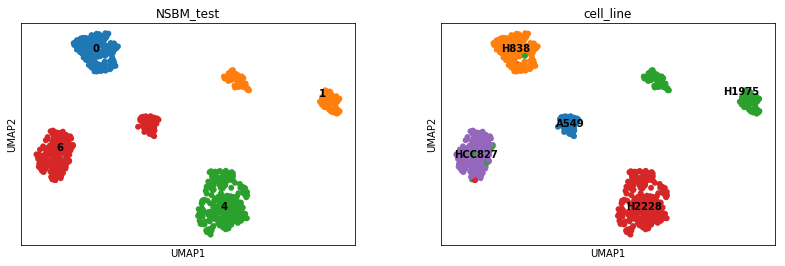

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0             0   176      7      0       0
1             0     0    127      0       0
4             0     0      0    295       0
6            62     0      4      1     188


In [20]:
adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(state.project_level(2).get_blocks()))
sc.pl.umap(adata, color=["NSBM_test", 'cell_line'], legend_loc='on data')
print(pd.crosstab(adata.obs.NSBM_test, adata.obs.cell_line))

In [21]:
pickle.dump(state, open('adata_10x/10x_multiflip_mcmc/multi_state_30k_d8.pkl', 'wb'), 2)

In [22]:
state_30k_d8=pickle.load(open('adata_10x/10x_multiflip_mcmc/multi_state_30k_d8.pkl','rb'))

### h) multiflip: niter=30.000 d=0.1 (2:18; giusto) (2:15, sbagliato)(2:18; giusto)(2:00 sbagliatissimo)
##### i tempi sono in linea: primo tentativo giusto, secondo tentativo : piccolo overclustering, terzo tentativo giusto, IV overclustering di una linea, e clustering sbagliato di un'altra

In [23]:
bs = state4.get_bs()                   
bs += [np.zeros(1)] * (10 - len(bs))
state = state4.copy(bs=bs, sampling=True)

In [24]:
state.multiflip_mcmc_sweep(d=0.1,niter=30000)

(13.89684876570497, 22661486, 363494)

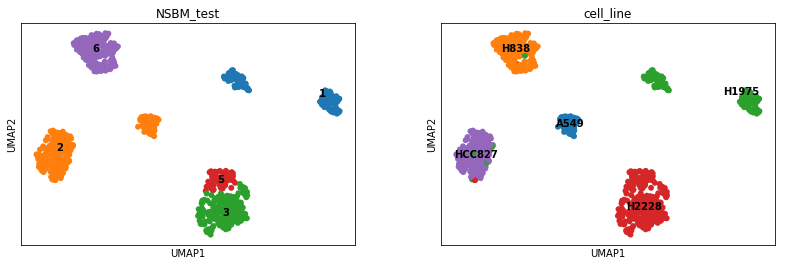

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
1             0     0    127      0       0
2            62     0      4      1     188
3             0     0      0    225       0
5             0     0      0     70       0
6             0   176      7      0       0


In [25]:
adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(state.project_level(2).get_blocks()))
sc.pl.umap(adata, color=["NSBM_test", 'cell_line'], legend_loc='on data')
print(pd.crosstab(adata.obs.NSBM_test, adata.obs.cell_line))

In [26]:
pickle.dump(state, open('adata_10x/10x_multiflip_mcmc/multi_state_30k_d10.pkl', 'wb'), 2)

In [27]:
state_30k_d10=pickle.load(open('adata_10x/10x_multiflip_mcmc/multi_state_30k_d10.pkl','rb'))

### i) multiflip: niter=40.000 d=0.1 (3:10; giusto)(3:03; sbagliato)(2:38; giusto(dS 6))(2:53; sbagliato (dS 21))
##### forse con i tempi ci si allunga un po troppo
#### IL RISULTATO CON MULTIFLIP VIENE CORRETTO SENZA OVERCLUSTERING E CON D ALTO SE USO NITER TRA 30K E 40K

In [38]:
bs = state4.get_bs()                   
bs += [np.zeros(1)] * (10 - len(bs))
state = state4.copy(bs=bs, sampling=True)

In [39]:
state.multiflip_mcmc_sweep(d=0.1,niter=40000)

(21.520439551016572, 29832756, 437714)

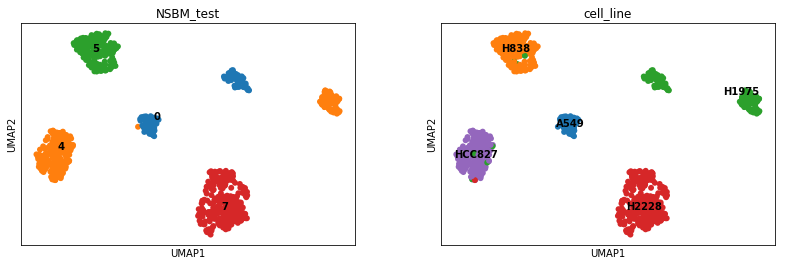

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0            61     0     56      0       0
4             1     0     75      1     188
5             0   176      7      0       0
7             0     0      0    295       0


In [40]:
adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(state.project_level(2).get_blocks()))
sc.pl.umap(adata, color=["NSBM_test", 'cell_line'], legend_loc='on data')
print(pd.crosstab(adata.obs.NSBM_test, adata.obs.cell_line))

In [41]:
pickle.dump(state, open('adata_10x/10x_multiflip_mcmc/multi_state_40k_d10.pkl', 'wb'), 2)

In [42]:
state_40k_d10=pickle.load(open('adata_10x/10x_multiflip_mcmc/multi_state_40k_d10.pkl','rb'))

### A) sweep: niter=50.000 (1:15, sbagliato) (1:18 , sbagliato)(1:20 sbagliato)
##### risultato il primo ha creato i gruppi giusti (piccolo overclustering che divide le H1975), il secondo fa overcluster sia di h1975 che hcc827, terzo overclustering di  tutte tranne h838 e a549
##### tempi sono molto più corti ma sembra che se non cambio D si fa sempre overclustering

In [ ]:
bs = state4.get_bs()                   
bs += [np.zeros(1)] * (10 - len(bs))
state = state4.copy(bs=bs, sampling=True)

In [95]:
state.mcmc_sweep(niter=50000)

(-33.42600587288064, 48552735, 14693826)

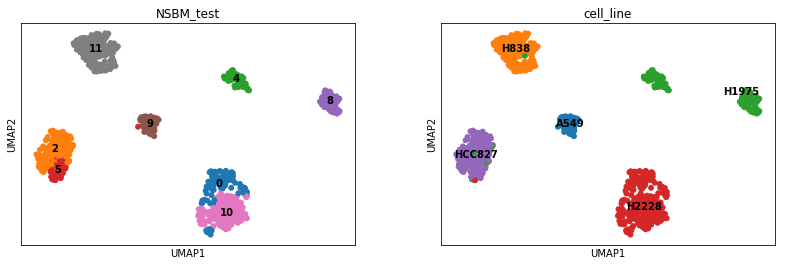

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0             0     0      0    102       0
2             0     0      3      0     142
4             0     0     56      0       0
5             1     0      1      1      46
8             0     0     71      0       0
9            61     0      0      0       0
10            0     0      0    193       0
11            0   176      7      0       0


In [96]:
adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(state.project_level(2).get_blocks()))
sc.pl.umap(adata, color=["NSBM_test", 'cell_line'], legend_loc='on data')
print(pd.crosstab(adata.obs.NSBM_test, adata.obs.cell_line))

In [97]:
pickle.dump(state, open('adata_10x/10x_multiflip_mcmc/state_50k.pkl', 'wb'), 2)

In [98]:
state_50k=pickle.load(open('adata_10x/10x_multiflip_mcmc/state_50k.pkl','rb'))

### B) sweep: niter= 30.000 (0:47, sbagliato(overclustering))

In [ ]:
bs = state4.get_bs()                   
bs += [np.zeros(1)] * (10 - len(bs))
state = state4.copy(bs=bs, sampling=True)

In [99]:
state.mcmc_sweep(niter=30000)

(14.693268057067202, 29111813, 8792689)

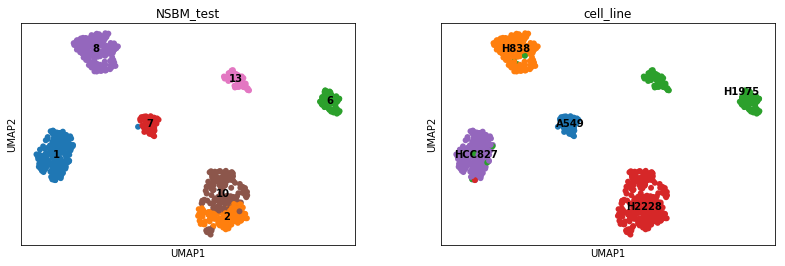

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
1             1     0      4      1     188
2             0     0      0    132       0
6             0     0     71      0       0
7            61     0      0      0       0
8             0   176      7      0       0
10            0     0      0    163       0
13            0     0     56      0       0


In [100]:
adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(state.project_level(2).get_blocks()))
sc.pl.umap(adata, color=["NSBM_test", 'cell_line'], legend_loc='on data')
print(pd.crosstab(adata.obs.NSBM_test, adata.obs.cell_line))

In [101]:
pickle.dump(state, open('adata_10x/10x_multiflip_mcmc/state_30k.pkl', 'wb'), 2)

In [102]:
state_30k=pickle.load(open('adata_10x/10x_multiflip_mcmc/state_30k.pkl','rb'))

#### VISTO CHE I TEMPI SONO MOLTO INFERIORI A MULTIFLIP POSSO AUMENTARE IL NITER
### C) sweep: niter=50.000 d=0.05 (1:19,sbagliato)(1:22 , sbagliato) 
##### risultati overcluster al primo tentativo, secondo tentativo overcluster)
##### tempi bassissimi in confronto al multiflip
#### ALZO IL D

In [ ]:
bs = state4.get_bs()                   
bs += [np.zeros(1)] * (10 - len(bs))
state = state4.copy(bs=bs, sampling=True)

In [107]:
state.mcmc_sweep(d=0.05,niter=50000)

(21.955038713413607, 48538410, 14107359)

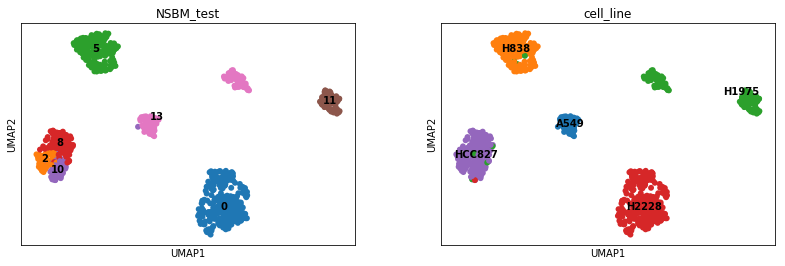

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0             0     0      0    295       0
2             0     0      1      0      51
5             0   176      7      0       0
8             0     0      2      0      91
10            1     0      1      1      46
11            0     0     71      0       0
13           61     0     56      0       0


In [125]:
adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(state_50k_d5.project_level(2).get_blocks()))
sc.pl.umap(adata, color=["NSBM_test", 'cell_line'], legend_loc='on data')
print(pd.crosstab(adata.obs.NSBM_test, adata.obs.cell_line))

In [109]:
pickle.dump(state, open('adata_10x/10x_multiflip_mcmc/state_50k_d5.pkl', 'wb'), 2)

In [110]:
state_50k_d5=pickle.load(open('adata_10x/10x_multiflip_mcmc/state_50k_d5.pkl','rb'))

### G) sweep: niter=50.000 d=0.1 (1.17 ;sbagliato) (1:10, sbagliato)(1:15, giusto al livello superiore)(IV sbagliato)
##### risultati I overcluster solo delle H1975, II stesso risultato del I, ancora uguale anche nel III: però al tentativo 3 sono divisi meglio al livello successivo e la divisione è corretta
##### tempi in linea

In [ ]:
bs = state4.get_bs()                   
bs += [np.zeros(1)] * (10 - len(bs))
state = state4.copy(bs=bs, sampling=True)

In [126]:
state.mcmc_sweep(d=0.1,niter=50000)

(13.249094499474662, 48594571, 13835512)

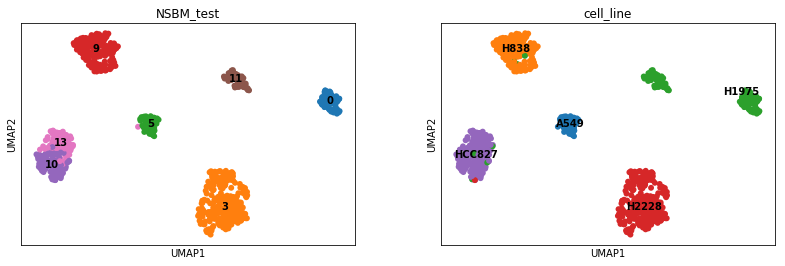

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0             0     0     71      0       0
3             0     0      0    295       0
5            61     0      0      0       0
9             0   176      7      0       0
10            0     0      3      1      94
11            0     0     56      0       0
13            1     0      1      0      94


In [134]:
adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(state_50k_d10.project_level(2).get_blocks()))
sc.pl.umap(adata, color=["NSBM_test", 'cell_line'], legend_loc='on data')
print(pd.crosstab(adata.obs.NSBM_test, adata.obs.cell_line))

In [131]:
pickle.dump(state, open('adata_10x/10x_multiflip_mcmc/state_50k_d10.pkl', 'wb'), 2)

In [132]:
state_50k_d10=pickle.load(open('adata_10x/10x_multiflip_mcmc/state_50k_d10.pkl','rb'))

### F) sweep: niter=100.000 d=0.05 (2:02 corretto; dS27)(1:58 giusto; dS26)(2:05 giusto dS=33)
##### risultati
##### tempi

In [151]:
bs = state4.get_bs()                   
bs += [np.zeros(1)] * (10 - len(bs))
state = state4.copy(bs=bs, sampling=True)

In [154]:
state.mcmc_sweep(d=0.05,niter=100000)

(6.210216585360515, 94986470, 30588080)

In [55]:
pickle.dump(state, open('adata_10x/10x_multiflip_mcmc/state_100k_d5.pkl', 'wb'), 2)

In [56]:
state_100k_d5=pickle.load(open('adata_10x/10x_multiflip_mcmc/state_100k_d5.pkl','rb'))

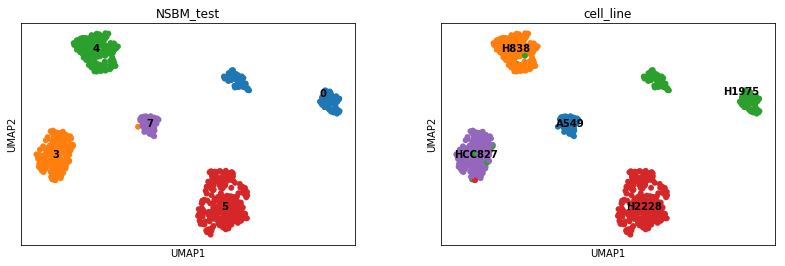

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0             0     0    127      0       0
3             1     0      4      1     188
4             0   176      7      0       0
5             0     0      0    295       0
7            61     0      0      0       0


In [155]:
adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(state_100k_d5.project_level(2).get_blocks()))
sc.pl.umap(adata, color=["NSBM_test", 'cell_line'], legend_loc='on data')
print(pd.crosstab(adata.obs.NSBM_test, adata.obs.cell_line))

### F) sweep: niter=100.000 d=0.1 ()
##### risultati
##### tempi

In [ ]:
bs = state4.get_bs()                   
bs += [np.zeros(1)] * (10 - len(bs))
state = state4.copy(bs=bs, sampling=True)

In [139]:
state.mcmc_sweep(d=0.1,niter=100000)

(20.426426165989508, 97170605, 27036676)

In [ ]:
pickle.dump(state, open('adata_10x/10x_multiflip_mcmc/state_100k_d10.pkl', 'wb'), 2)

In [ ]:
state_100k_d10=pickle.load(open('adata_10x/10x_multiflip_mcmc/state_100k_d10.pkl','rb'))

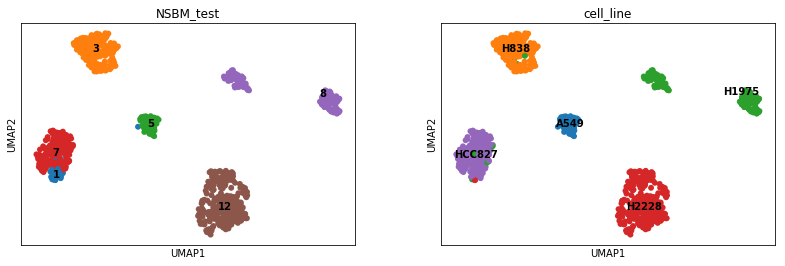

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
1             1     0      1      1      25
3             0   176      7      0       0
5            61     0      0      0       0
7             0     0      3      0     163
8             0     0    127      0       0
12            0     0      0    295       0


In [140]:
adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(state_100k_d10.project_level(2).get_blocks()))
sc.pl.umap(adata, color=["NSBM_test", 'cell_line'], legend_loc='on data')
print(pd.crosstab(adata.obs.NSBM_test, adata.obs.cell_line))

### MCMC SWEEP risulta migliore di MULTIFLIP sia dal punto di vista delle tempistiche(effettua più niter in meno tempo), sia dal punto di vista della correttezza del risultato. Provo a fare i gibbs sweep e alla fine scelgo i parametri migliori per mcmc sweep
### gibbs1) gibbs 100.000 (0:30)

In [61]:
bs = state4.get_bs()                   
bs += [np.zeros(1)] * (10 - len(bs))
state = state4.copy(bs=bs, sampling=True)

In [62]:
state.multiflip_mcmc_sweep(d=0.1,gibbs_sweeps=100000)

(2.0184569566519492, 875, 16)

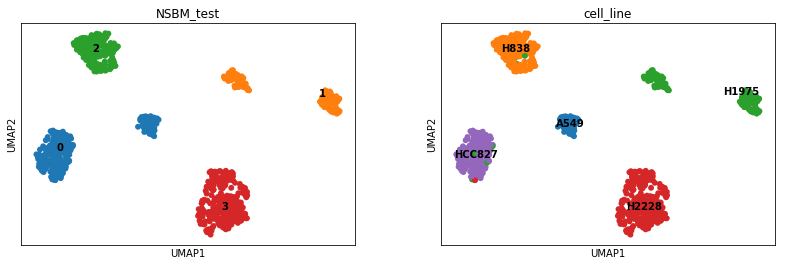

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0            62     0      4      1     188
1             0     0    127      0       0
2             0   176      7      0       0
3             0     0      0    295       0


In [63]:
adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(state.project_level(2).get_blocks()))
sc.pl.umap(adata, color=["NSBM_test", 'cell_line'], legend_loc='on data')
print(pd.crosstab(adata.obs.NSBM_test, adata.obs.cell_line))

### gibbs2) gibbs1.000 niter=10.000 (0:05 giusto dS9)(0:04 sbagliato overclustering dS59)(0:04 giusto dS22)(0:04 sbagliato dS 52)(sbagliato dS43)(giusto dS59)(giusto dS9) 

In [95]:
bs = state4.get_bs()                   
bs += [np.zeros(1)] * (10 - len(bs))
state = state4.copy(bs=bs, sampling=True)

In [96]:
state.multiflip_mcmc_sweep(d=0.1,gibbs_sweeps=1000,niter=10.000)

(9.949341566236011, 7735, 146)

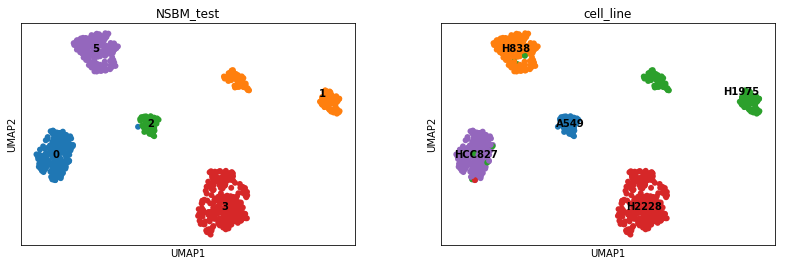

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0             1     0      4      1     188
1             0     0    127      0       0
2            61     0      0      0       0
3             0     0      0    295       0
5             0   176      7      0       0


In [97]:
adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(state.project_level(2).get_blocks()))
sc.pl.umap(adata, color=["NSBM_test", 'cell_line'], legend_loc='on data')
print(pd.crosstab(adata.obs.NSBM_test, adata.obs.cell_line))

In [98]:
pickle.dump(state, open('adata_10x/10x_multiflip_mcmc/g_state_10k_g1k.pkl', 'wb'), 2)

In [99]:
g_state_10k_g1k=pickle.load(open('adata_10x/10x_multiflip_mcmc/g_state_10k_g1k.pkl','rb'))

### gibbs2) gibbs1.000 niter=100.000 (0:33 giusto dS23)(0:33 giusto sD22)(0:33 giusto dS24)

In [144]:
bs = state4.get_bs()                   
bs += [np.zeros(1)] * (10 - len(bs))
state = state4.copy(bs=bs, sampling=True)

In [145]:
state.multiflip_mcmc_sweep(d=0.1,gibbs_sweeps=1000,niter=100.000)

(36.94208535043999, 75597, 1470)

In [113]:
pickle.dump(state, open('adata_10x/10x_multiflip_mcmc/g_state_100k_g1k.pkl', 'wb'), 2)

In [114]:
g_state_100k_g1k=pickle.load(open('adata_10x/10x_multiflip_mcmc/g_state_10k_g1k.pkl','rb'))

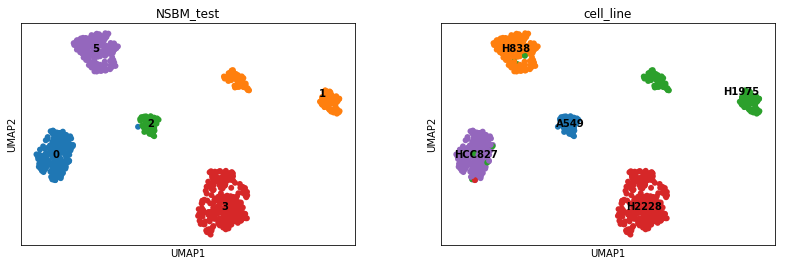

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0             1     0      4      1     188
1             0     0    127      0       0
2            61     0      0      0       0
3             0     0      0    295       0
5             0   176      7      0       0


In [146]:
adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(g_state_100k_g1k.project_level(2).get_blocks()))
sc.pl.umap(adata, color=["NSBM_test", 'cell_line'], legend_loc='on data')
print(pd.crosstab(adata.obs.NSBM_test, adata.obs.cell_line))

### Multiflip fatto con gibbs sweep non solo è più veloce, ma da anche lo stesso risultato sia in termini di tempo, gruppi divisi e dS in maniera corretta. ora punto a valutarlo facendo partire in ciclo lo stesso multiflip , osservando che risultati ottengo
# 5) valutazione gibbs 1000 d0.1
### a) 10 cicli niter=10.000 (0:34)
##### 6/10 corrette

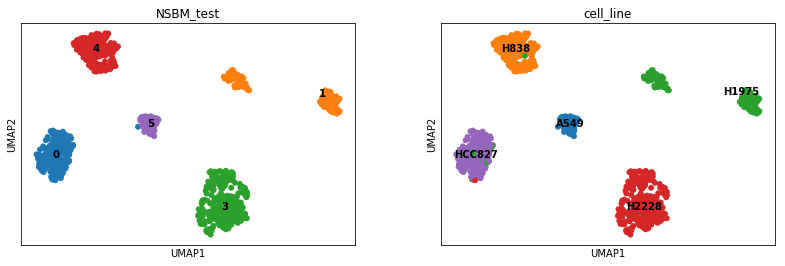

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0             1     0      4      1     188
1             0     0    127      0       0
3             0     0      0    295       0
4             0   176      7      0       0
5            61     0      0      0       0


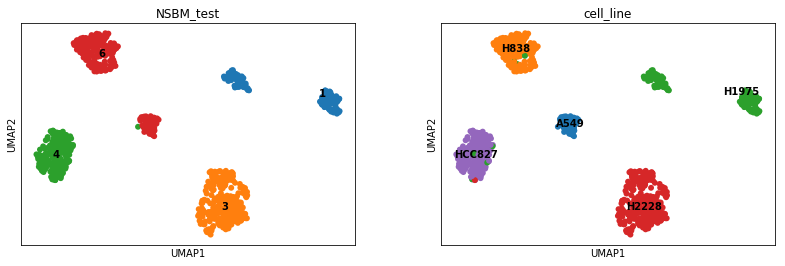

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
1             0     0    127      0       0
3             0     0      0    295       0
4             1     0      4      1     188
6            61   176      7      0       0


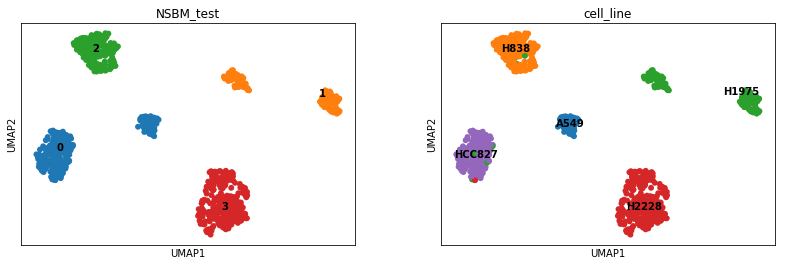

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0            62     0      4      1     188
1             0     0    127      0       0
2             0   176      7      0       0
3             0     0      0    295       0


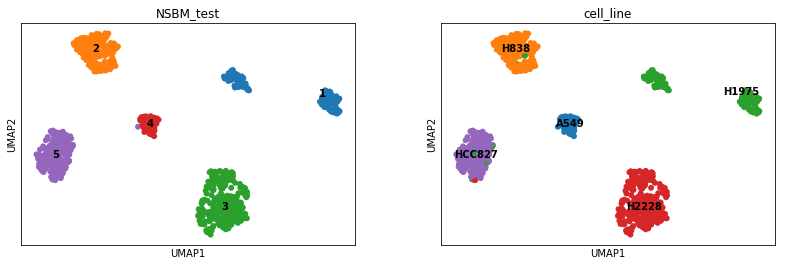

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
1             0     0    127      0       0
2             0   176      7      0       0
3             0     0      0    295       0
4            61     0      0      0       0
5             1     0      4      1     188


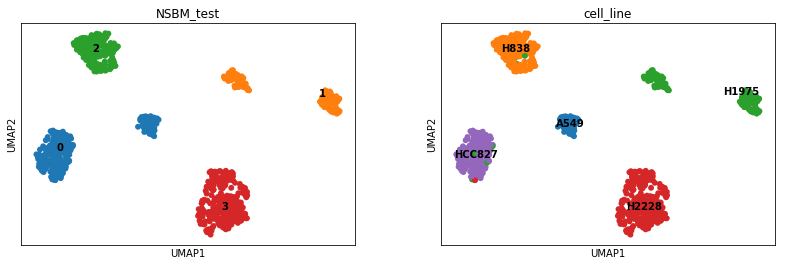

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0            62     0      4      1     188
1             0     0    127      0       0
2             0   176      7      0       0
3             0     0      0    295       0


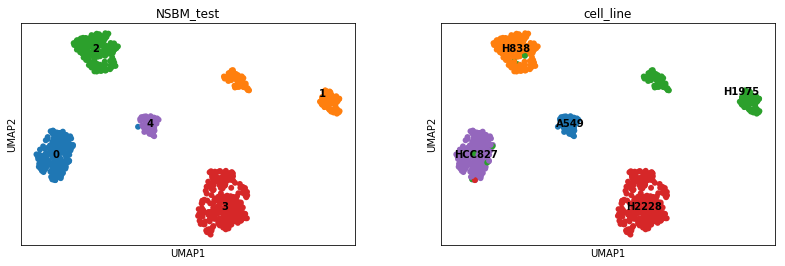

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0             1     0      4      1     188
1             0     0    127      0       0
2             0   176      7      0       0
3             0     0      0    295       0
4            61     0      0      0       0


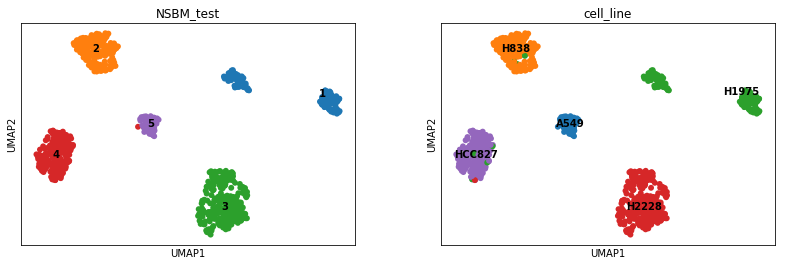

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
1             0     0    127      0       0
2             0   176      7      0       0
3             0     0      0    295       0
4             1     0      4      1     188
5            61     0      0      0       0


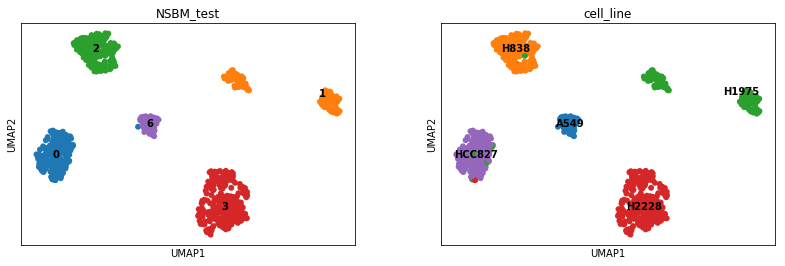

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0             1     0      4      1     188
1             0     0    127      0       0
2             0   176      7      0       0
3             0     0      0    295       0
6            61     0      0      0       0


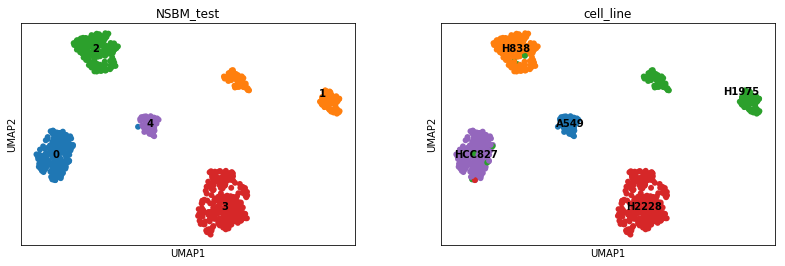

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0             1     0      4      1     188
1             0     0    127      0       0
2             0   176      7      0       0
3             0     0      0    295       0
4            61     0      0      0       0


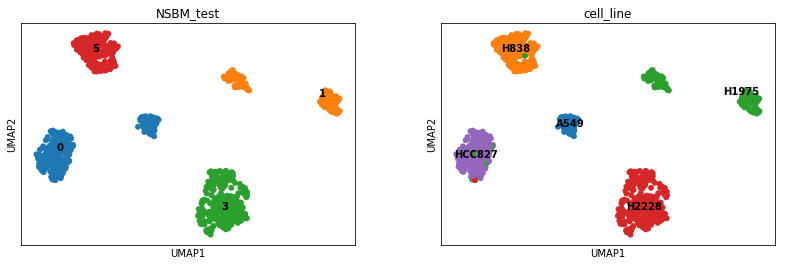

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0            62     0      4      1     188
1             0     0    127      0       0
3             0     0      0    295       0
5             0   176      7      0       0


In [128]:
dS=[]
nattempts=[]
nchanges=[]

for i in range (10):
    bs = state4.get_bs()                   
    bs += [np.zeros(1)] * (10 - len(bs))
    state = state4.copy(bs=bs, sampling=True)
    a,b,c=state.multiflip_mcmc_sweep(d=0.1,gibbs_sweeps=1000,niter=10.000)
    adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(state.project_level(2).get_blocks()))
    sc.pl.umap(adata, color=["NSBM_test", 'cell_line'], legend_loc='on data')
    print(pd.crosstab(adata.obs.NSBM_test, adata.obs.cell_line))
    dS.append(a)
    nattempts.append(b)
    nchanges.append(c)

In [129]:
print(dS)
print(nattempts)
print(nchanges)

[20.679757437189355, 29.269799231987474, 44.43992004610435, 30.15356012204713, 48.0583342760478, 21.43072014675404, 27.057292623253545, 15.784704687328368, 52.001538347360906, 35.08406530573787]
[7530, 7227, 7676, 7278, 7196, 7740, 7602, 7951, 7677, 7890]
[135, 203, 182, 174, 186, 213, 217, 253, 224, 248]


### b) 10 cicli: niter=50.000 (2:32)
##### 7/10 giuste

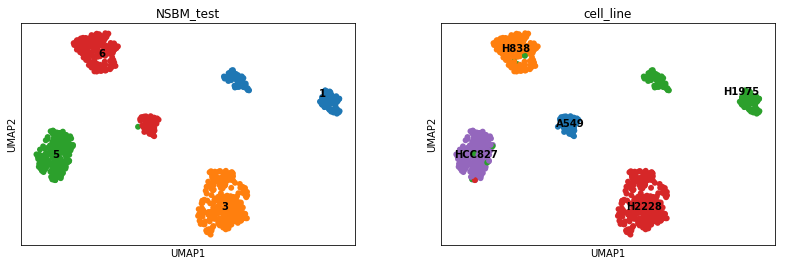

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
1             0     0    127      0       0
3             0     0      0    295       0
5             1     0      4      1     188
6            61   176      7      0       0


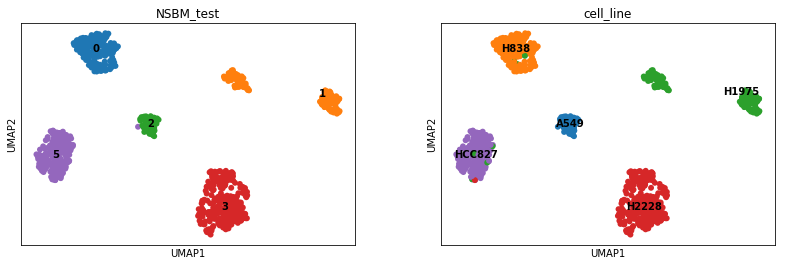

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0             0   176      7      0       0
1             0     0    127      0       0
2            61     0      0      0       0
3             0     0      0    295       0
5             1     0      4      1     188


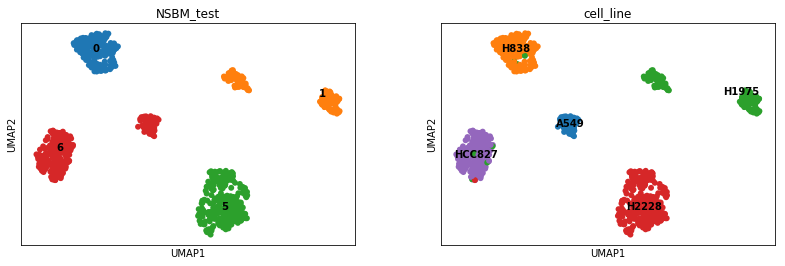

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0             0   176      7      0       0
1             0     0    127      0       0
5             0     0      0    295       0
6            62     0      4      1     188


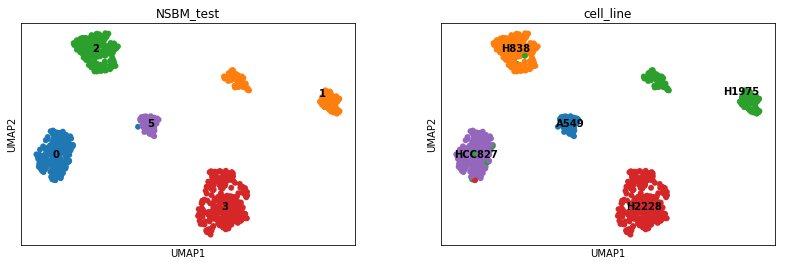

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0             1     0      4      1     188
1             0     0    127      0       0
2             0   176      7      0       0
3             0     0      0    295       0
5            61     0      0      0       0


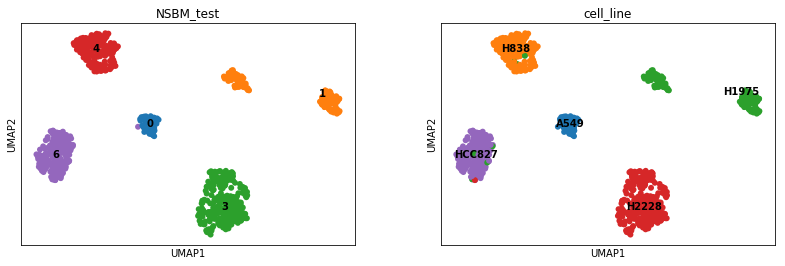

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0            61     0      0      0       0
1             0     0    127      0       0
3             0     0      0    295       0
4             0   176      7      0       0
6             1     0      4      1     188


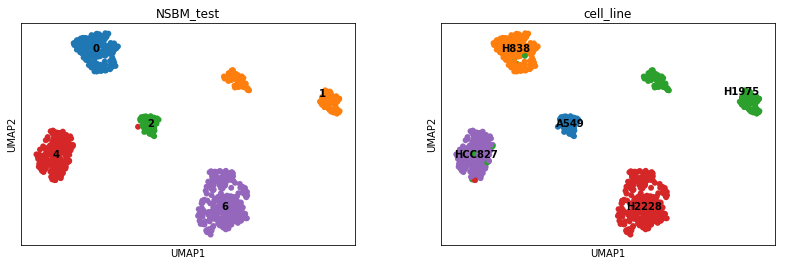

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0             0   176      7      0       0
1             0     0    127      0       0
2            61     0      0      0       0
4             1     0      4      1     188
6             0     0      0    295       0


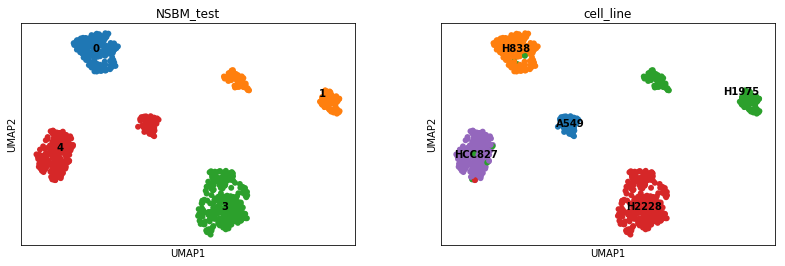

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0             0   176      7      0       0
1             0     0    127      0       0
3             0     0      0    295       0
4            62     0      4      1     188


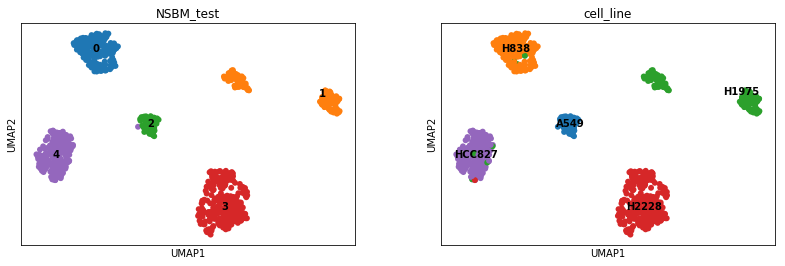

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0             0   176      7      0       0
1             0     0    127      0       0
2            61     0      0      0       0
3             0     0      0    295       0
4             1     0      4      1     188


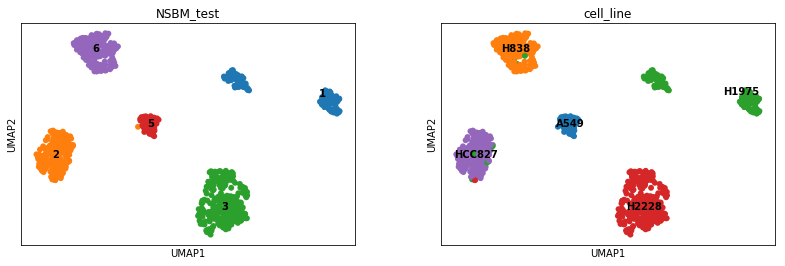

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
1             0     0    127      0       0
2             1     0      4      1     188
3             0     0      0    295       0
5            61     0      0      0       0
6             0   176      7      0       0


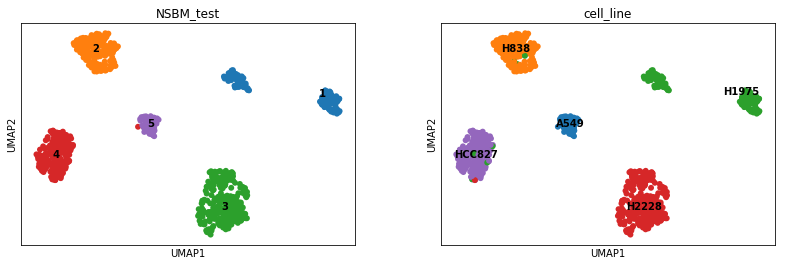

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
1             0     0    127      0       0
2             0   176      7      0       0
3             0     0      0    295       0
4             1     0      4      1     188
5            61     0      0      0       0


In [130]:
dS=[]
nattempts=[]
nchanges=[]

for i in range (10):
    bs = state4.get_bs()                   
    bs += [np.zeros(1)] * (10 - len(bs))
    state = state4.copy(bs=bs, sampling=True)
    a,b,c=state.multiflip_mcmc_sweep(d=0.1,gibbs_sweeps=1000,niter=50.000)
    adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(state.project_level(2).get_blocks()))
    sc.pl.umap(adata, color=["NSBM_test", 'cell_line'], legend_loc='on data')
    print(pd.crosstab(adata.obs.NSBM_test, adata.obs.cell_line))
    dS.append(a)
    nattempts.append(b)
    nchanges.append(c)

In [131]:
print(dS)
print(nattempts)
print(nchanges)

[62.241149254919605, 38.065754698429345, 56.50064314678116, 62.11378815133115, 20.710611856258442, 36.76219936474084, 18.322375810748103, 47.98191828164407, 30.06202691075411, 53.62754856826205]
[36512, 37148, 37631, 36899, 38356, 38176, 37568, 37524, 37356, 37263]
[1024, 672, 659, 1032, 816, 893, 731, 777, 706, 638]


### c) 10  cicli: niter=100.000 (5:04)
##### 6/4 giusti

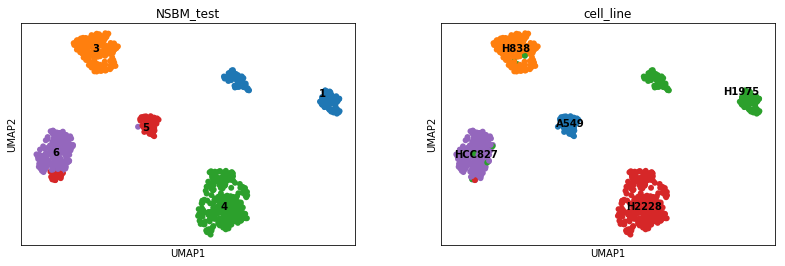

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
1             0     0    127      0       0
3             0   176      7      0       0
4             0     0      0    295       0
5            61     0      1      1      20
6             1     0      3      0     168


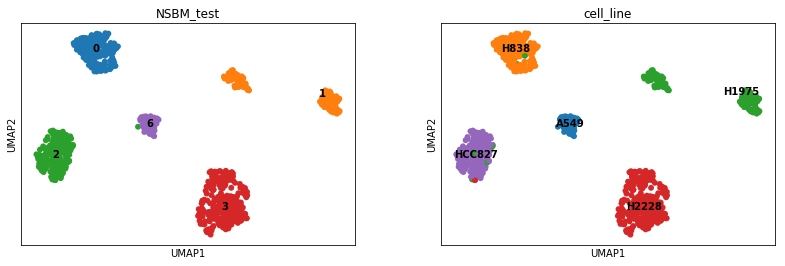

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0             0   176      7      0       0
1             0     0    127      0       0
2             1     0      4      1     188
3             0     0      0    295       0
6            61     0      0      0       0


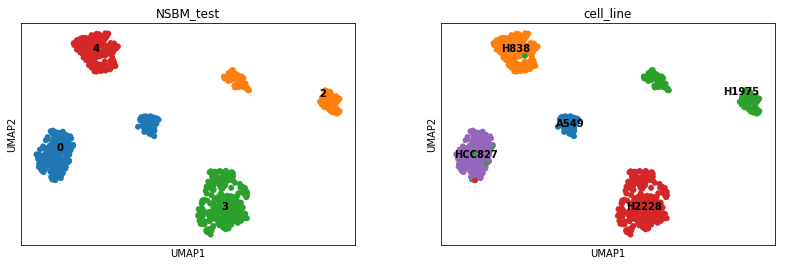

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0            62     0      4      1     188
2             0     0    127      0       0
3             0     0      0    295       0
4             0   176      7      0       0


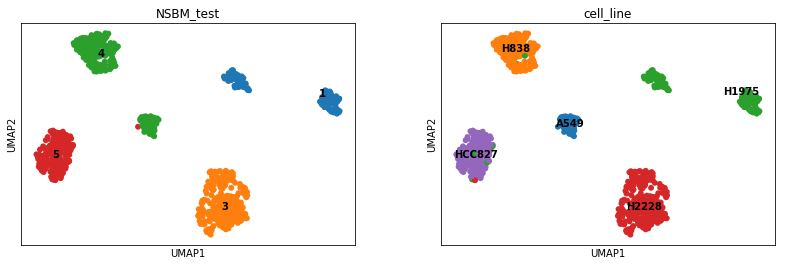

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
1             0     0    127      0       0
3             0     0      0    295       0
4            61   176      7      0       0
5             1     0      4      1     188


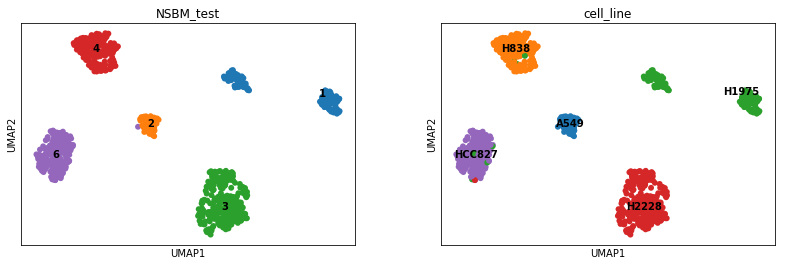

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
1             0     0    127      0       0
2            61     0      0      0       0
3             0     0      0    295       0
4             0   176      7      0       0
6             1     0      4      1     188


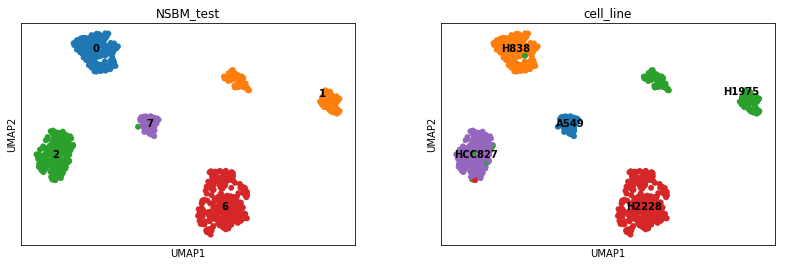

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0             0   176      7      0       0
1             0     0    127      0       0
2             1     0      4      1     188
6             0     0      0    295       0
7            61     0      0      0       0


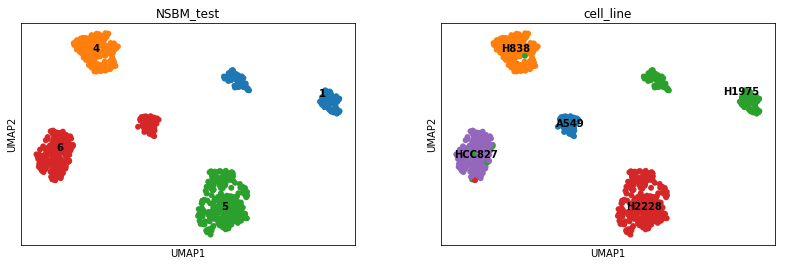

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
1             0     0    127      0       0
4             0   176      7      0       0
5             0     0      0    295       0
6            62     0      4      1     188


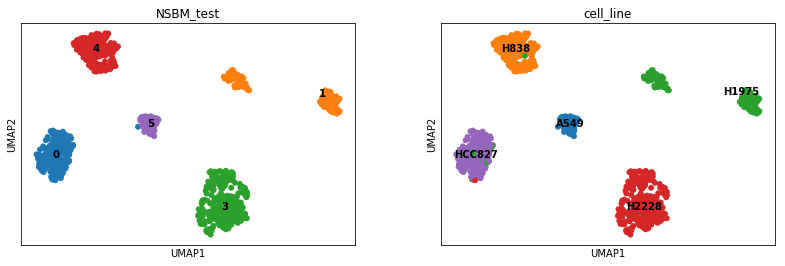

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0             1     0      4      1     188
1             0     0    127      0       0
3             0     0      0    295       0
4             0   176      7      0       0
5            61     0      0      0       0


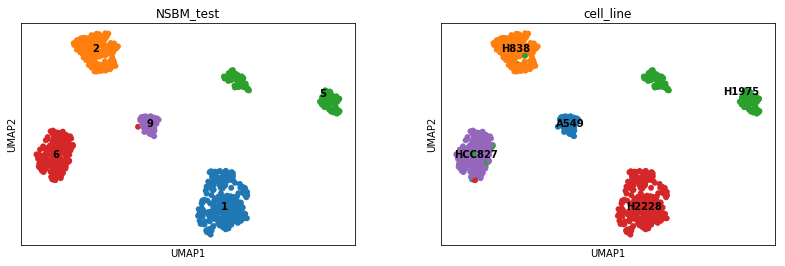

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
1             0     0      0    295       0
2             0   176      7      0       0
5             0     0    127      0       0
6             1     0      4      1     188
9            61     0      0      0       0


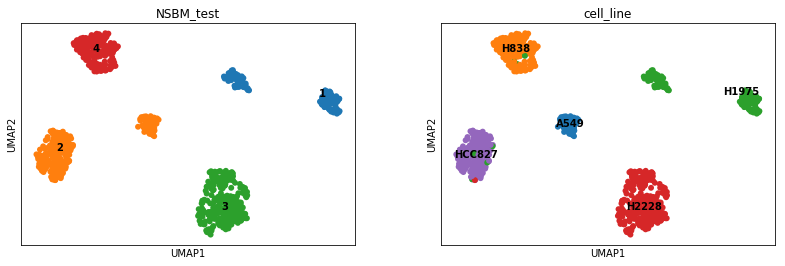

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
1             0     0    127      0       0
2            62     0      4      1     188
3             0     0      0    295       0
4             0   176      7      0       0


In [133]:
dS=[]
nattempts=[]
nchanges=[]

for i in range (10):
    bs = state4.get_bs()                   
    bs += [np.zeros(1)] * (10 - len(bs))
    state = state4.copy(bs=bs, sampling=True)
    a,b,c=state.multiflip_mcmc_sweep(d=0.1,gibbs_sweeps=1000,niter=100.000)
    adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(state.project_level(2).get_blocks()))
    sc.pl.umap(adata, color=["NSBM_test", 'cell_line'], legend_loc='on data')
    print(pd.crosstab(adata.obs.NSBM_test, adata.obs.cell_line))
    dS.append(a)
    nattempts.append(b)
    nchanges.append(c)

In [134]:
print(dS)
print(nattempts)
print(nchanges)

[23.036109255060552, 22.92461262177902, 43.345306783803636, 8.06691465197851, 35.87022558348738, -3.871559742730284, 5.694331663052786, 34.4293617493482, 27.94391309271535, 47.477358457869556]
[74292, 74457, 75682, 75466, 74439, 75267, 75630, 75007, 73869, 74107]
[1644, 1678, 1658, 1830, 1556, 1419, 1373, 1332, 1970, 1729]


### il problema prinicpale non è nell'overclustering ma nel troppo clustering che unisce linee cellulari diverse, quindi provo a diminuire un pò la D e vedo se i gruppi che vengono uniti erroneamente,non vengopno più uniti
# 6) valutazione gibbs 1000 d0.08
### a) 10 cicli niter=10.000 
##### 4/10 giusti

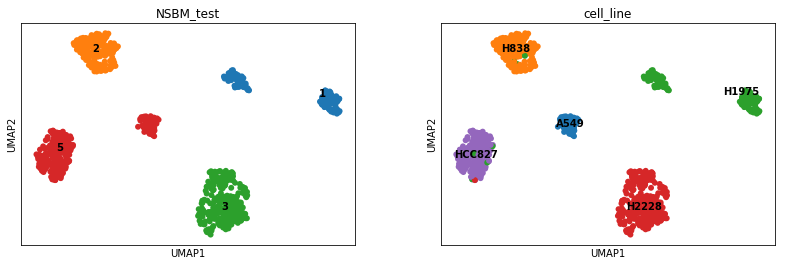

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
1             0     0    127      0       0
2             0   176      7      0       0
3             0     0      0    295       0
5            62     0      4      1     188


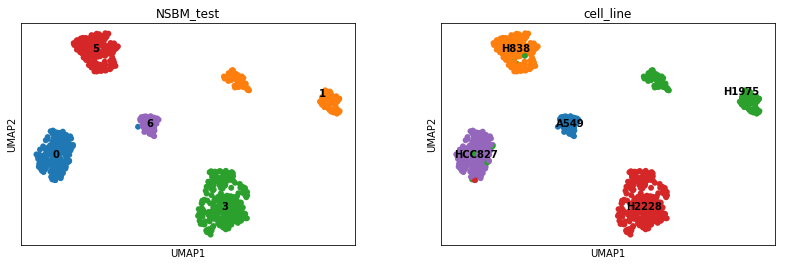

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0             1     0      4      1     188
1             0     0    127      0       0
3             0     0      0    295       0
5             0   176      7      0       0
6            61     0      0      0       0


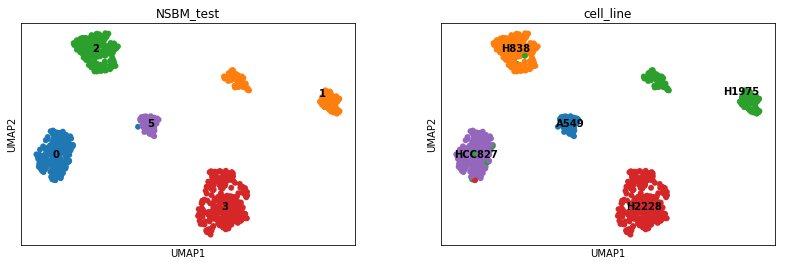

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0             1     0      4      1     188
1             0     0    127      0       0
2             0   176      7      0       0
3             0     0      0    295       0
5            61     0      0      0       0


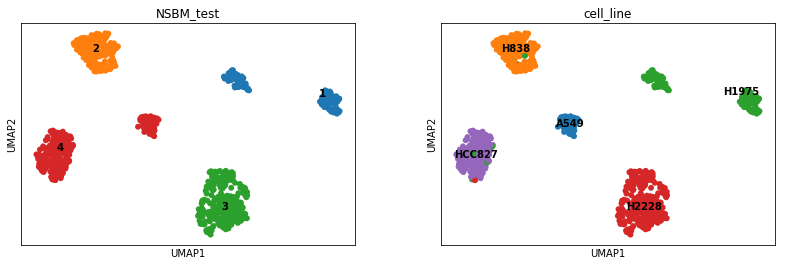

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
1             0     0    127      0       0
2             0   176      7      0       0
3             0     0      0    295       0
4            62     0      4      1     188


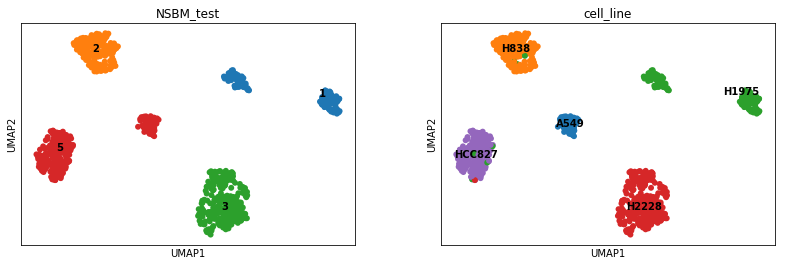

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
1             0     0    127      0       0
2             0   176      7      0       0
3             0     0      0    295       0
5            62     0      4      1     188


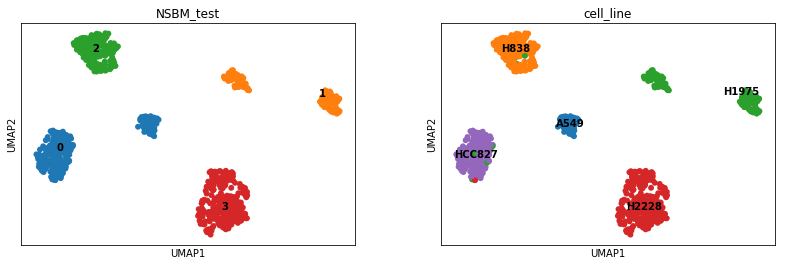

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0            62     0      4      1     188
1             0     0    127      0       0
2             0   176      7      0       0
3             0     0      0    295       0


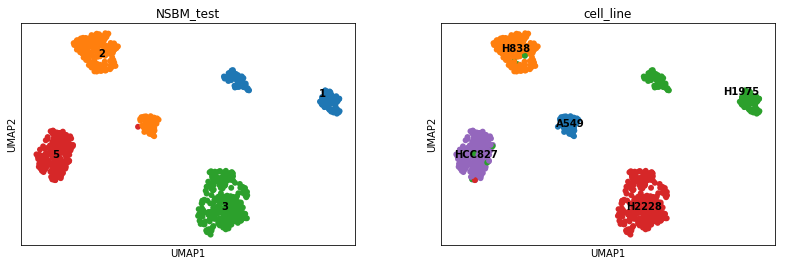

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
1             0     0    127      0       0
2            61   176      7      0       0
3             0     0      0    295       0
5             1     0      4      1     188


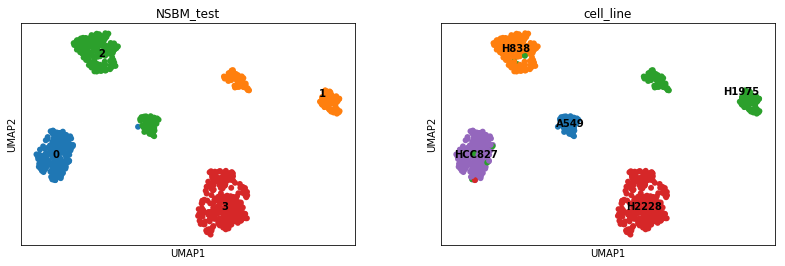

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0             1     0      4      1     188
1             0     0    127      0       0
2            61   176      7      0       0
3             0     0      0    295       0


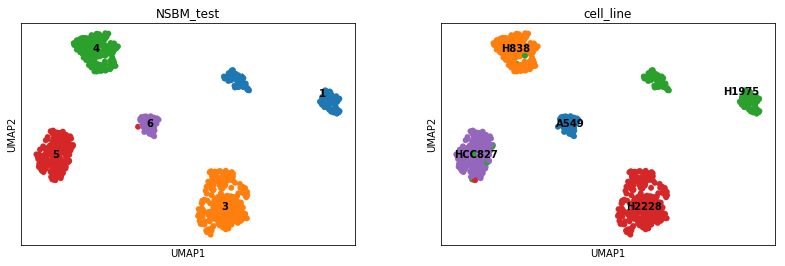

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
1             0     0    127      0       0
3             0     0      0    295       0
4             0   176      7      0       0
5             1     0      4      1     188
6            61     0      0      0       0


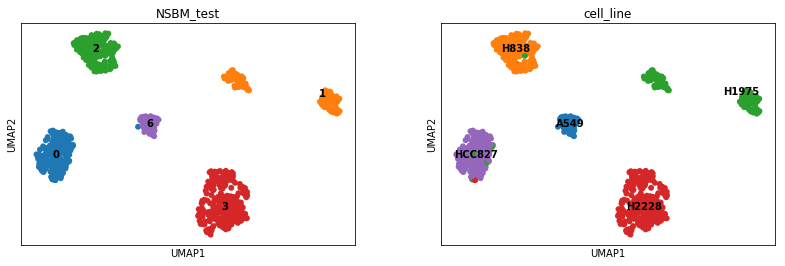

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0             1     0      4      1     188
1             0     0    127      0       0
2             0   176      7      0       0
3             0     0      0    295       0
6            61     0      0      0       0


In [135]:
dS=[]
nattempts=[]
nchanges=[]

for i in range (10):
    bs = state4.get_bs()                   
    bs += [np.zeros(1)] * (10 - len(bs))
    state = state4.copy(bs=bs, sampling=True)
    a,b,c=state.multiflip_mcmc_sweep(d=0.08,gibbs_sweeps=1000,niter=10.000)
    adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(state.project_level(2).get_blocks()))
    sc.pl.umap(adata, color=["NSBM_test", 'cell_line'], legend_loc='on data')
    print(pd.crosstab(adata.obs.NSBM_test, adata.obs.cell_line))
    dS.append(a)
    nattempts.append(b)
    nchanges.append(c)

In [136]:
print(dS)
print(nattempts)
print(nchanges)

[25.08699902462819, 13.392275589613927, 29.63340267430099, 46.081826510161534, 18.99266104281443, 57.010738808372494, 32.53464697908342, 40.94877841334485, 34.795858270070795, 26.518896095972906]
[7532, 7188, 7496, 7673, 7319, 7711, 7834, 7260, 8066, 7351]
[165, 168, 151, 184, 110, 149, 154, 236, 201, 197]


### b) 10 cicli niter=50.000 
##### 3/10 giuste

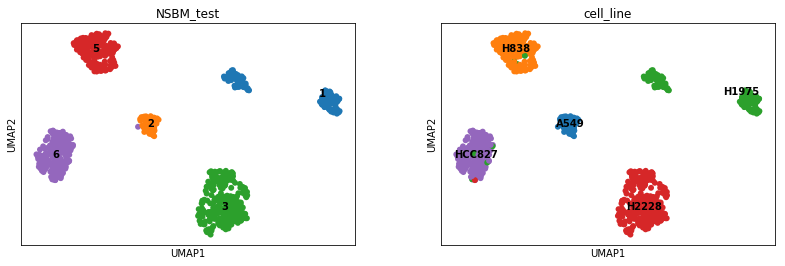

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
1             0     0    127      0       0
2            61     0      0      0       0
3             0     0      0    295       0
5             0   176      7      0       0
6             1     0      4      1     188


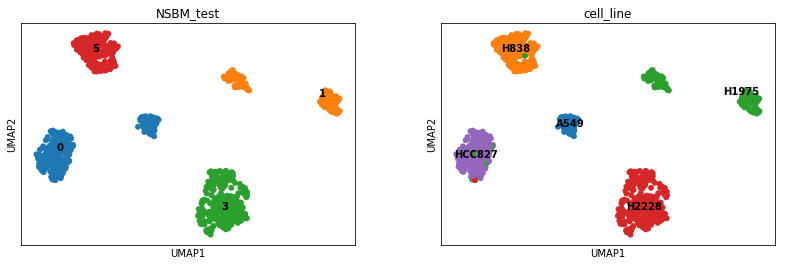

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0            62     0      4      1     188
1             0     0    127      0       0
3             0     0      0    295       0
5             0   176      7      0       0


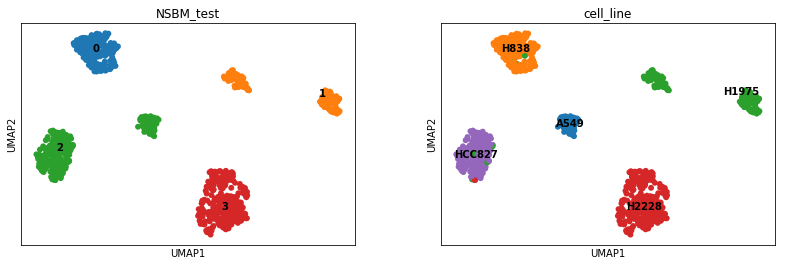

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0             0   176      7      0       0
1             0     0    127      0       0
2            62     0      4      1     188
3             0     0      0    295       0


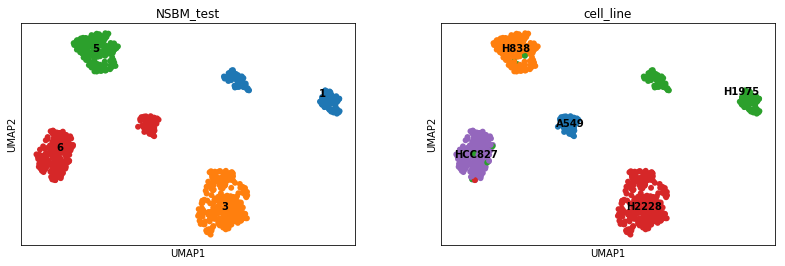

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
1             0     0    127      0       0
3             0     0      0    295       0
5             0   176      7      0       0
6            62     0      4      1     188


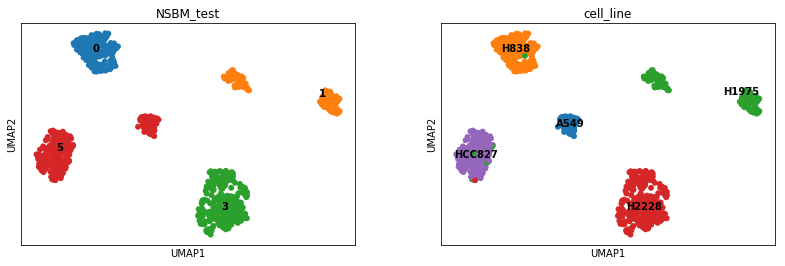

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0             0   176      7      0       0
1             0     0    127      0       0
3             0     0      0    295       0
5            62     0      4      1     188


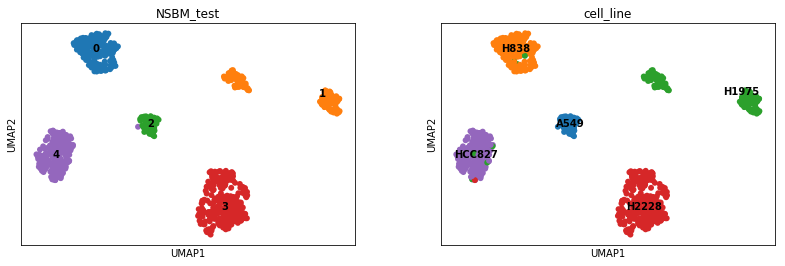

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0             0   176      7      0       0
1             0     0    127      0       0
2            61     0      0      0       0
3             0     0      0    295       0
4             1     0      4      1     188


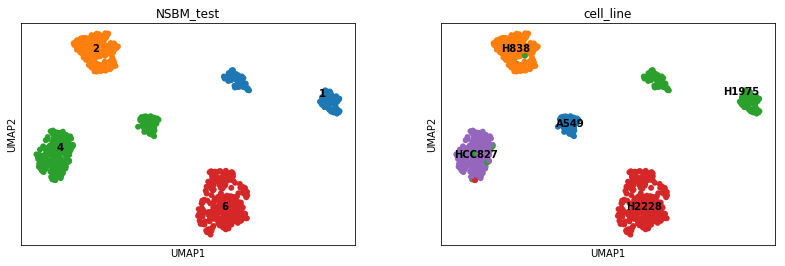

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
1             0     0    127      0       0
2             0   176      7      0       0
4            62     0      4      1     188
6             0     0      0    295       0


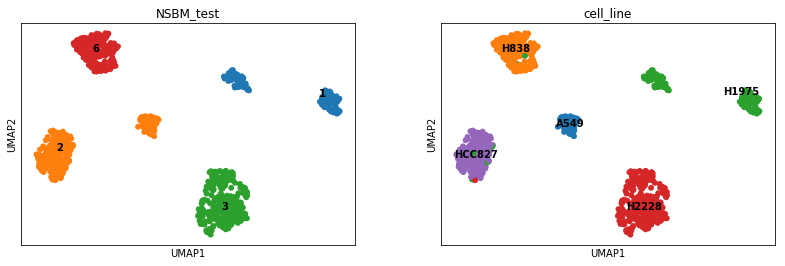

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
1             0     0    127      0       0
2            62     0      4      1     188
3             0     0      0    295       0
6             0   176      7      0       0


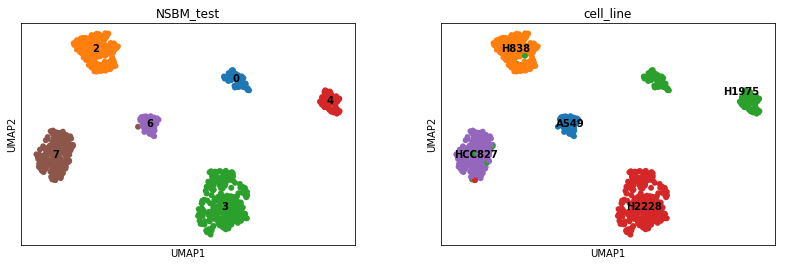

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0             0     0     56      0       0
2             0   176      7      0       0
3             0     0      0    295       0
4             0     0     71      0       0
6            61     0      0      0       0
7             1     0      4      1     188


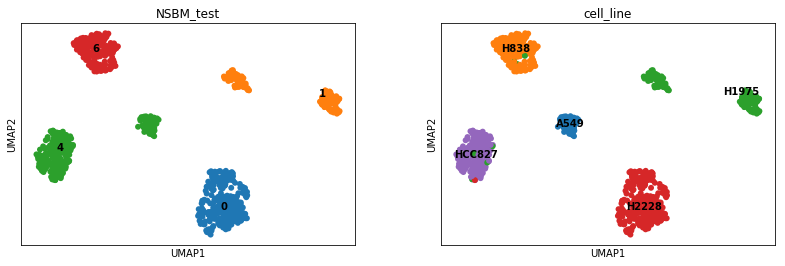

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0             0     0      0    295       0
1             0     0    127      0       0
4            62     0      4      1     188
6             0   176      7      0       0


In [137]:
dS=[]
nattempts=[]
nchanges=[]

for i in range (10):
    bs = state4.get_bs()                   
    bs += [np.zeros(1)] * (10 - len(bs))
    state = state4.copy(bs=bs, sampling=True)
    a,b,c=state.multiflip_mcmc_sweep(d=0.08,gibbs_sweeps=1000,niter=50.000)
    adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(state.project_level(2).get_blocks()))
    sc.pl.umap(adata, color=["NSBM_test", 'cell_line'], legend_loc='on data')
    print(pd.crosstab(adata.obs.NSBM_test, adata.obs.cell_line))
    dS.append(a)
    nattempts.append(b)
    nchanges.append(c)

In [138]:
print(dS)
print(nattempts)
print(nchanges)

[45.249079659482874, 47.588744002599874, 17.63691594606298, 31.118493618483296, 22.78726867983004, 27.081318657678978, 43.368868271871804, 27.58915741110736, 51.682461904670376, 43.32056724294959]
[37459, 37675, 37727, 37690, 37268, 37207, 37897, 37947, 37032, 37352]
[949, 776, 788, 993, 794, 787, 760, 759, 806, 746]


### c) 10 cicli niter=100.000 
##### 3/10 giuste

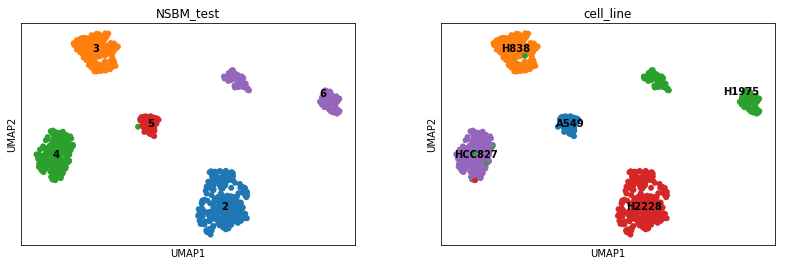

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
2             0     0      0    295       0
3             0   176      7      0       0
4             1     0      4      1     188
5            61     0      0      0       0
6             0     0    127      0       0


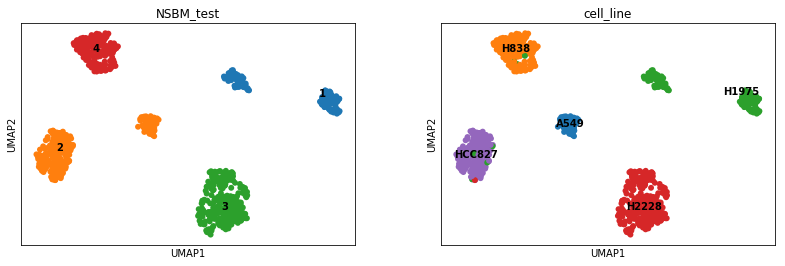

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
1             0     0    127      0       0
2            62     0      4      1     188
3             0     0      0    295       0
4             0   176      7      0       0


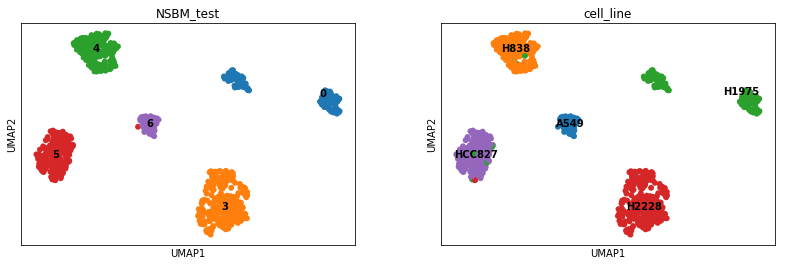

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0             0     0    127      0       0
3             0     0      0    295       0
4             0   176      7      0       0
5             1     0      4      1     188
6            61     0      0      0       0


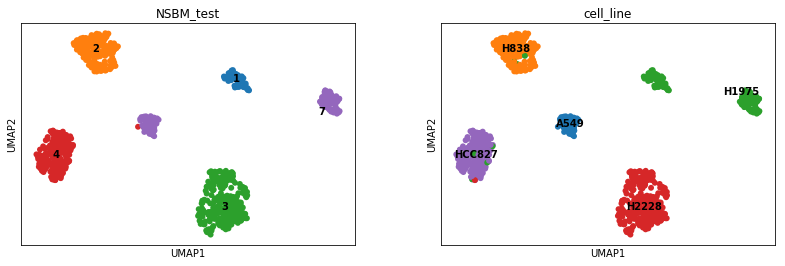

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
1             0     0     56      0       0
2             0   176      7      0       0
3             0     0      0    295       0
4             1     0      4      1     188
7            61     0     71      0       0


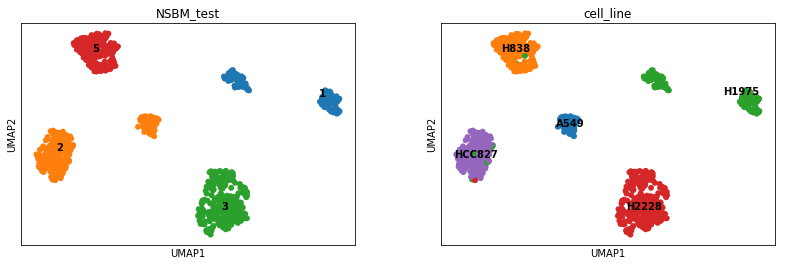

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
1             0     0    127      0       0
2            62     0      4      1     188
3             0     0      0    295       0
5             0   176      7      0       0


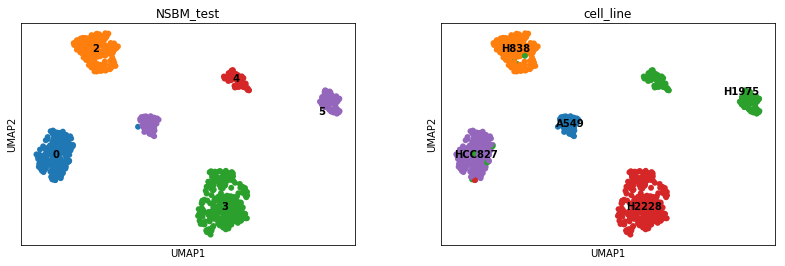

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0             1     0      4      1     188
2             0   176      7      0       0
3             0     0      0    295       0
4             0     0     56      0       0
5            61     0     71      0       0


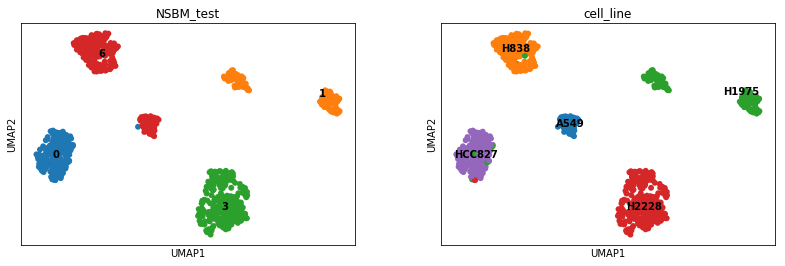

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0             1     0      4      1     188
1             0     0    127      0       0
3             0     0      0    295       0
6            61   176      7      0       0


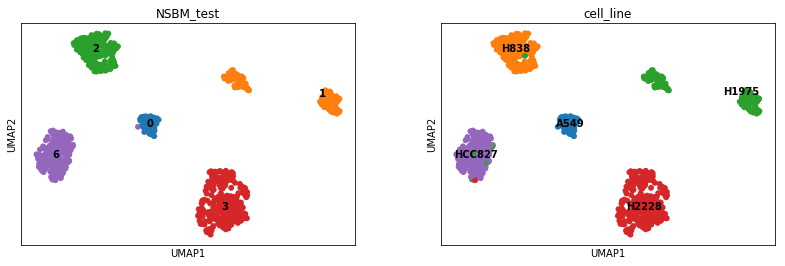

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0            61     0      0      0       0
1             0     0    127      0       0
2             0   176      7      0       0
3             0     0      0    295       0
6             1     0      4      1     188


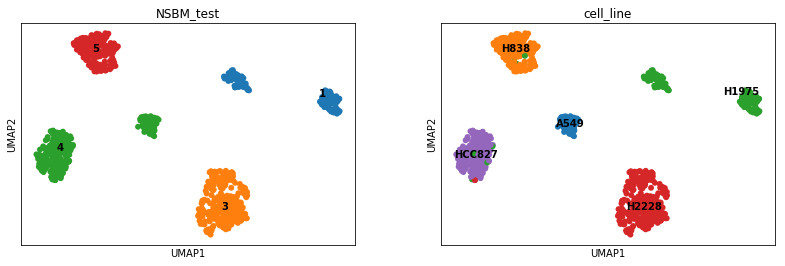

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
1             0     0    127      0       0
3             0     0      0    295       0
4            62     0      4      1     188
5             0   176      7      0       0


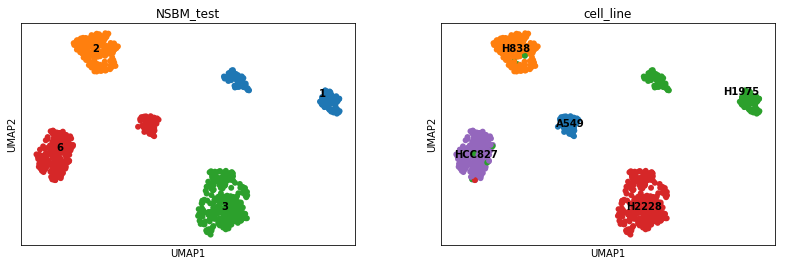

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
1             0     0    127      0       0
2             0   176      7      0       0
3             0     0      0    295       0
6            62     0      4      1     188


In [139]:
dS=[]
nattempts=[]
nchanges=[]

for i in range (10):
    bs = state4.get_bs()                   
    bs += [np.zeros(1)] * (10 - len(bs))
    state = state4.copy(bs=bs, sampling=True)
    a,b,c=state.multiflip_mcmc_sweep(d=0.08,gibbs_sweeps=1000,niter=100.000)
    adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(state.project_level(2).get_blocks()))
    sc.pl.umap(adata, color=["NSBM_test", 'cell_line'], legend_loc='on data')
    print(pd.crosstab(adata.obs.NSBM_test, adata.obs.cell_line))
    dS.append(a)
    nattempts.append(b)
    nchanges.append(c)

In [140]:
print(dS)
print(nattempts)
print(nchanges)

[41.91245215704642, 72.53647969150835, 36.32476473713486, 66.10779864559746, 51.149039216573755, 20.869448412522054, 33.40431061230011, 24.495243687627607, 9.502360965291409, 44.075513236495745]
[73681, 74808, 73779, 73891, 72638, 74419, 75282, 74834, 74430, 72795]
[1367, 1499, 1378, 1517, 1611, 1541, 1431, 1371, 1630, 1394]


# 7) valutazione mcmc sweep


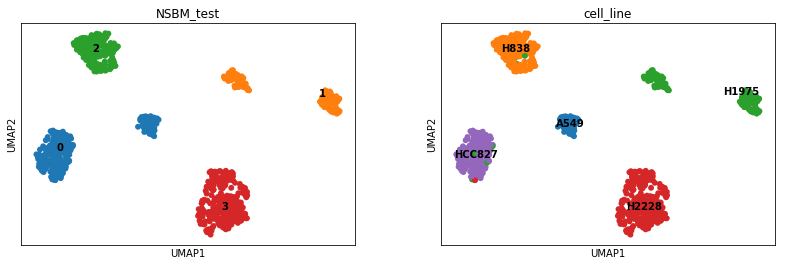

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0            62     0      4      1     188
1             0     0    127      0       0
2             0   176      7      0       0
3             0     0      0    295       0


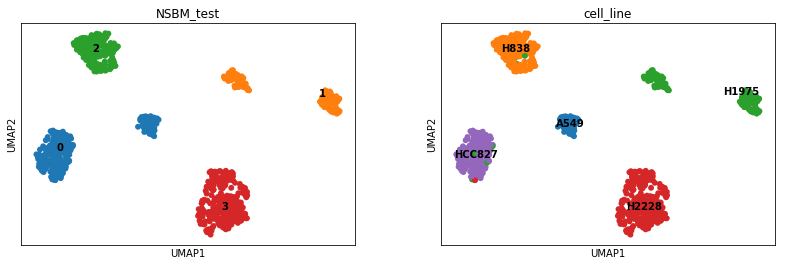

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0            62     0      4      1     188
1             0     0    127      0       0
2             0   176      7      0       0
3             0     0      0    295       0


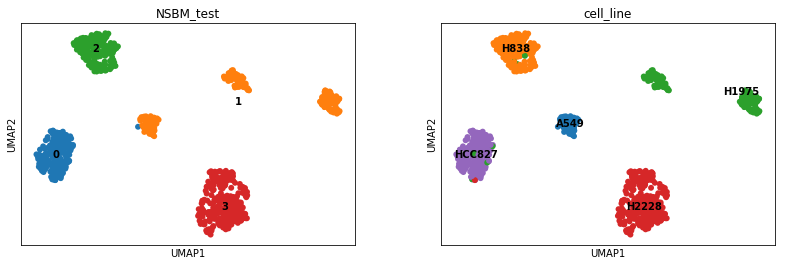

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0             1     0      4      1     188
1            61     0    127      0       0
2             0   176      7      0       0
3             0     0      0    295       0


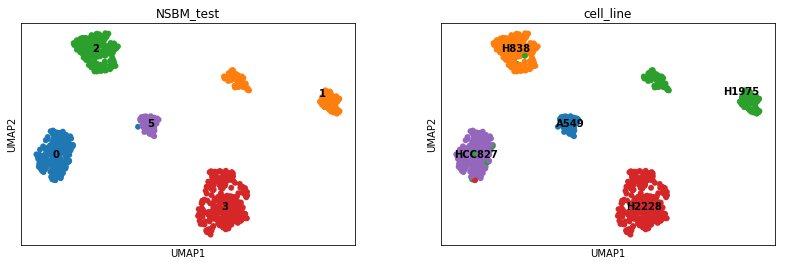

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0             1     0      4      1     188
1             0     0    127      0       0
2             0   176      7      0       0
3             0     0      0    295       0
5            61     0      0      0       0


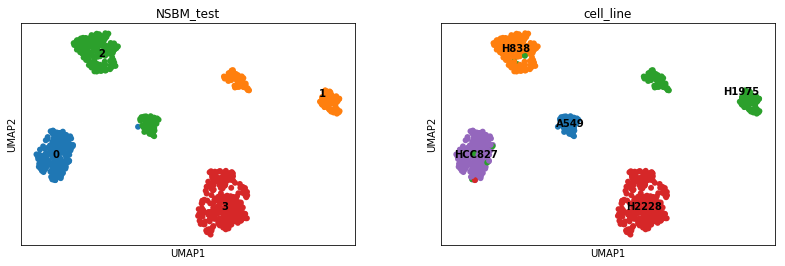

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0             1     0      4      1     188
1             0     0    127      0       0
2            61   176      7      0       0
3             0     0      0    295       0


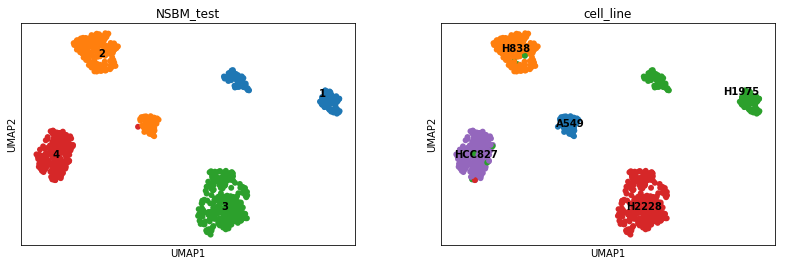

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
1             0     0    127      0       0
2            61   176      7      0       0
3             0     0      0    295       0
4             1     0      4      1     188


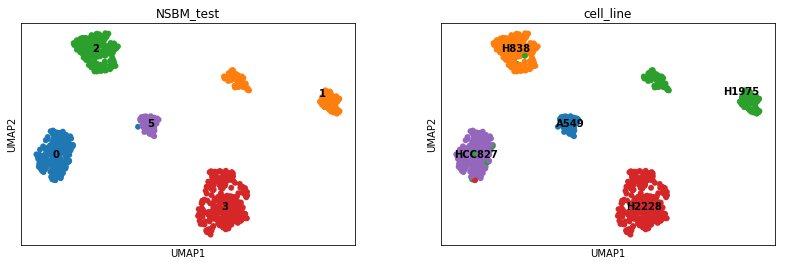

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0             1     0      4      1     188
1             0     0    127      0       0
2             0   176      7      0       0
3             0     0      0    295       0
5            61     0      0      0       0


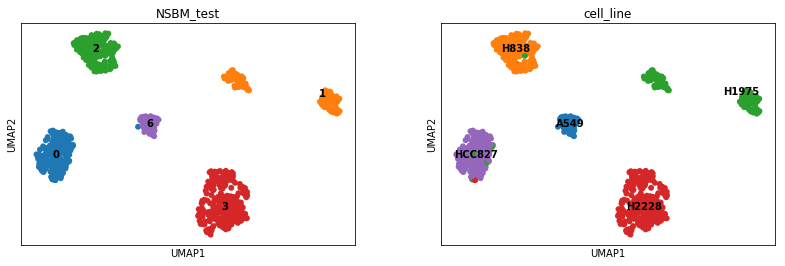

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0             1     0      4      1     188
1             0     0    127      0       0
2             0   176      7      0       0
3             0     0      0    295       0
6            61     0      0      0       0


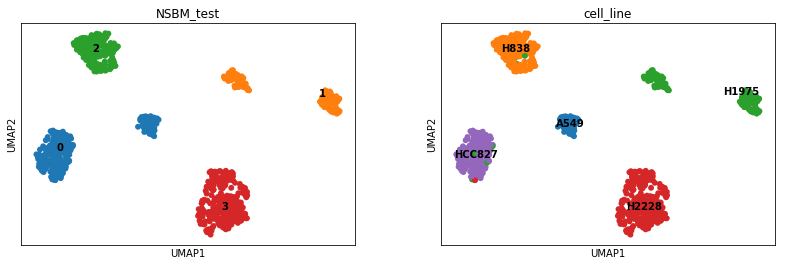

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0            62     0      4      1     188
1             0     0    127      0       0
2             0   176      7      0       0
3             0     0      0    295       0


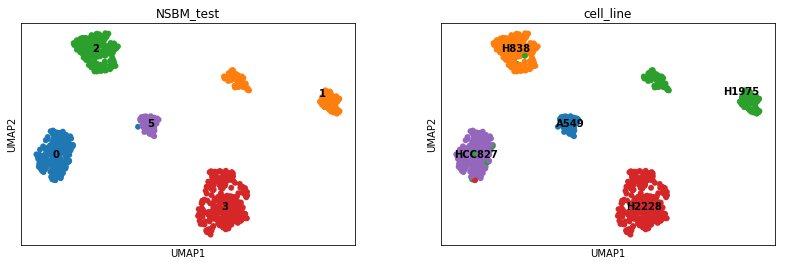

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0             1     0      4      1     188
1             0     0    127      0       0
2             0   176      7      0       0
3             0     0      0    295       0
5            61     0      0      0       0


In [149]:
dS=[]
nattempts=[]
nchanges=[]

for i in range (10):
    bs = state4.get_bs()                   
    bs += [np.zeros(1)] * (10 - len(bs))
    state = state4.copy(bs=bs, sampling=True)
    a,b,c=state.mcmc_sweep(d=0.05,niter=100.000)
    adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(state.project_level(2).get_blocks()))
    sc.pl.umap(adata, color=["NSBM_test", 'cell_line'], legend_loc='on data')
    print(pd.crosstab(adata.obs.NSBM_test, adata.obs.cell_line))
    dS.append(a)
    nattempts.append(b)
    nchanges.append(c)

In [150]:
print(dS)
print(nattempts)
print(nchanges)

[36.08901854149025, 32.02347426411858, 13.861770103334003, 33.79494835972807, 27.597439775428242, 38.8177544212118, 11.909499992998512, 29.009591190890497, 27.006024839723995, 33.97740119836723]
[94666, 94598, 94579, 94699, 94592, 94498, 94598, 94685, 94495, 94598]
[29346, 29679, 29184, 29110, 29597, 28954, 29282, 29515, 29260, 29793]


# MCMC SWEEP NITER 100.000 d 0.05 (2 min)
# MULTIFLIP SWEEP GIBBS 1000 NITER 100.000 d=0.1 (30 sec)